#### Candidate numbers: 10006, 10098, 10084.

### TMA4215 Numerical Mathematics - Project 2

# Introduction

In this project we will be looking at numerical methods for signal processing, mainly in usage of algorithms based on Fourier transforms. Fourier Transforms are widely used in the field of signal processing, as we can use it for transforming spatio-temporal signals to the frequency domain. Having done so, one can easily filter out unwanted signals, before inversely recreating the filtered signal. This can among other fields be used in image decomposition, as we will demonstrate towards the end of the project. The project is divided in to four main tasks, which again are further separated into smaller sub-tasks. In Task 1, we will start by deriving some necessary results that we will need later.

## Task 1 - The (Discrete) Fourier transform

#### a) Orthonormality of complex exponentials

We are working with periodic functions, so clearly complex exponentials and/or trigonometric functions will become very useful. Let's study one of the important properties of complex exponentials; orthonormality. Given functions $e^{2\pi i k x},\, e^{2\pi i h x}$ where $k, h\in\mathbb{Z}$ and $x\in\mathbb{T}$ we have

$$
\langle e^{2\pi i k \cdot} , e^{2\pi i h \cdot}\rangle=
\begin{cases}
1& \text{if } k=h\\
0& \text{else}.
\end{cases}
$$

**Proof:**

$$
\langle e^{2\pi i k \cdot} , e^{2\pi i h \cdot}\rangle = \int_0^1 e^{2\pi i k x} \overline{e^{2\pi i h x}}\,\text{d}x=\int_0^1 e^{2\pi i k x} e^{-2\pi i h x}\,\text{d}x = \int_0^1 e^{2\pi i (k-h) x}\,\text{d}x
$$

Here we see that if $h=k$, we get 

$$
\langle e^{2\pi i k \cdot} , e^{2\pi i h \cdot}\rangle = \int_0^1 1\,\text{d}x = 1
$$

If $h\neq k$,

$$
\langle e^{2\pi i k \cdot} , e^{2\pi i h \cdot}\rangle = \int_0^1 e^{2\pi i (k-h) x} \,\text{d}x
=\frac{e^{2\pi i (k-h)}-1}{2\pi i (k-h)}=0,
$$

where the last equality follows from the fact that $e^{2\pi i n}=1$ when $n\in \mathbb{Z}$. Thus, we have

$$
\langle e^{2\pi i k \cdot} , e^{2\pi i h \cdot}\rangle=
\begin{cases}
1& \text{if } k=h\\
0& \text{else}.
\end{cases}
\hspace{0.8cm} \square
$$

#### b) Orthonormality of trigonometric functions

As for complex exponentials, we look at the inner product for some trigonometric functions. Here we want to prove the following three results: 

$$ 
\begin{aligned}
\langle \sqrt{2} \sin\left(2\pi n \cdot\right),\sqrt{2} \sin\left(2\pi m \cdot\right) \rangle &= 0 \\

\langle \sqrt{2} \sin\left(2\pi n \cdot\right),\sqrt{2} \sin\left(2\pi m \cdot\right) \rangle &=
\begin{cases}
0& \text{if } n \neq m,\\
1& \text{if } n = m,
\end{cases} \\

 \langle \sqrt{2} \cos\left(2\pi n \cdot\right),\sqrt{2} \cos\left(2\pi m \cdot\right) \rangle &=
\begin{cases}
2& \text{if } n,m=0,\\
1& \text{if } n=m \neq 0,\\
0& \text{if } n \neq m.
\end{cases} \\
\end{aligned}
$$


**Proof:**


$$
 \langle \sqrt{2} \sin\left(2\pi n \cdot\right),\sqrt{2} \cos\left(2\pi m \cdot\right) \rangle \hspace{1cm}  ,n \in \{1,2,3,...\}, m \in \{0,1,2,...\}
$$

$$
\langle \sqrt{2} \sin\left(2\pi n \cdot\right),\sqrt{2} \sin\left(2\pi m \cdot\right) \rangle = \int_{0}^{1}\sqrt{2} \sin\left(2\pi n x\right) \cdot \sqrt{2} \cos\left(2\pi m x\right) dx = \int_{0}^{1} 2 \sin\left(2\pi n x\right) \cdot \cos\left(2\pi m x\right) dx
$$

We now use the following trigonometric identity:
$$
\sin(A)\cos(B) = \frac{1}{2}\sin\bigl(A+B\bigr) + \frac{1}{2}\sin\bigl(A-B\bigr)
$$
$$
\begin{aligned}
&\Rightarrow \int_{0}^{1} 2 \sin\left(2\pi n x\right) \cdot \cos\left(2\pi n x\right) dx = \int_{0}^{1} \Bigl(\sin\bigl(2\pi x(n+m)\bigr) + \sin\bigl(2 \pi x(n-m)\bigr)\Bigr) dx \\
 &= -\frac{1}{2 \pi (n+m)} \cos\bigl(2 \pi(n+m)x\bigr)\Big|_0^1 - \frac{1}{2 \pi (n-m)} \cos\bigl(2 \pi(n-m)x\bigr)\Big|_0^1
\end{aligned}
$$
Here we note that the equality for our last term is only valid as long as $ m \neq n$. Otherwize, this intergral would be zero, which we take note of. 

$$
\begin{aligned}
\Rightarrow 
 -\frac{1}{2 \pi (n+m)} \Bigl(\cos\bigl(2 \pi(n+m)\bigr) - 1\Bigr) - \frac{1}{2 \pi (n-m)} \Bigl(\cos\bigl(2 \pi(n-m)\bigr) - 1\Bigr)
\end{aligned}
$$

We use that $\cos(2\pi c) = 1$ for all $ c \in \mathbb{Z}$, and that $n \pm m \in \mathbb{Z}$ for all $m,n \in \mathbb{Z}$
$$
\Rightarrow -\frac{1}{2 \pi (n+m)} \Bigl(\cos\bigl(2 \pi(n+m)\bigr) - 1\Bigr) - \frac{1}{2 \pi (n-m)} \Bigl(\cos\bigl(2 \pi(n-m)\bigr) - 1\Bigr) = 0
$$

As we noted earlier, $ m = n$ would also gives us 0 for our integral. Thus, we can conclude:
$$
\langle \sqrt{2} \sin\left(2\pi n \cdot\right),\sqrt{2} \sin\left(2\pi m \cdot\right) \rangle = 0 \hspace{0.5cm} \square
$$

We then look at the following inner product:

$$
 \langle \sqrt{2} \sin\left(2\pi n \cdot\right),\sqrt{2} \sin\left(2\pi m \cdot\right) \rangle \hspace{1cm}  ,n,m \in \{1,2,3,...\}
$$

$$
\langle \sqrt{2} \sin\left(2\pi n \cdot\right),\sqrt{2} \sin\left(2\pi m \cdot\right) \rangle = \int_{0}^{1}\sqrt{2} \sin\left(2\pi n x\right) \cdot \sqrt{2} \sin\left(2\pi m x\right) dx = \int_{0}^{1} 2 \sin\left(2\pi n x\right) \cdot \sin\left(2\pi m x\right) dx
$$
We first look at the case where $ m = n$:
$$
\int_{0}^{1} 2 \sin\left(2\pi n x\right) \cdot \sin\left(2\pi n x\right) dx
= \int_{0}^{1} 2 \sin^2\left(2\pi n x\right) dx \hspace{1cm} 
$$

We then use the following trigonometric identity to rewrite our integral.
$$
 \sin^2\left(z\right) = \frac{1}{2} - \frac{1}{2}\cos{2z}
$$

$$
\Rightarrow  \int_{0}^{1} 2 \sin^2\left(2\pi n x\right) dx = \int_{0}^{1} 1 - \cos\left(4\pi n x\right)  dx = 1 - \frac{1}{4 \pi n} \left(\sin\left(4\pi n x\right)\right)\Big|_{0}^{1} 
$$

Knowing that $ \sin\left(2\pi n\right) = 0$ for  all $ n \in \mathbb{Z}$, our equation simplifies greatly:

$$
\Rightarrow 1 - \frac{1}{4 \pi n} \left(1 - 1\right) = 1
$$

We now look at the case where $ n \neq m$.
Here we will need the following identity:

$$
\sin(A)\sin(B) = \frac{1}{2} \left(\cos \left(A-B\right) - \cos \left(A+B\right) \right)
$$

Using this, we rewrite our equation. 


$$
\begin{aligned}
\int_{0}^{1} 2 \sin(2\pi n x)\sin(2\pi m x) dx &= \int_{0}^{1} \cos\bigl(2 \pi x(n-m)\bigr) dx -  \int_{0}^{1}\cos\bigl(2 \pi x(n+m)\bigr) \\
  &= \frac{1}{2 \pi (n-m)} \Bigl(\sin \bigl(2\pi(n-m)x\bigr)\Bigr)\Big|_0^1 - \frac{1}{2 \pi (n+m)} \Bigl(\sin \bigl(2\pi(n+m)x\bigr)\Bigr)\Big|_0^1
\end{aligned}
$$

We now use that $\sin(2\pi c) = 0$ for all $ c \in \mathbb{Z}$, and that $n \pm m \in \mathbb{Z}$ for all $m,n \in \mathbb{Z}$

$$
\begin{aligned}
 \Rightarrow \frac{1}{2 \pi (n-m)} \Bigl(\sin \bigl(2\pi(n-m)x\bigr)\Bigr)\Big|_0^1 - \frac{1}{2 \pi (n+m)} \Bigl(\sin \bigl(2\pi(n+m)x\bigr)\Bigr)\Big|_0^1 = 0
\end{aligned}
$$


$$
 \langle \sqrt{2} \sin\left(2\pi n \cdot\right),\sqrt{2} \sin\left(2\pi m \cdot\right) \rangle=
\begin{cases}
0& \text{if } n \neq m,\\
1& \text{if } n = m,
\end{cases}
\hspace{1cm}\square
$$



Lastly, we look at this inner product:

$$
 \langle \sqrt{2} \cos\left(2\pi n \cdot\right),\sqrt{2} \cos\left(2\pi m \cdot\right) \rangle \hspace{1cm}  , m,n \in \{0,1,2,...\}
$$


$$
\langle \sqrt{2} \cos\left(2\pi n \cdot\right),\sqrt{2} \cos\left(2\pi m \cdot\right) \rangle = \int_{0}^{1}\sqrt{2} \cos\left(2\pi n x\right) \cdot \sqrt{2} \cos\left(2\pi m x\right) dx = \int_{0}^{1} 2 \cos\left(2\pi n x\right) \cdot \cos\left(2\pi m x\right) dx
$$

Here we will need the following identity:
$$
\cos(A)\cos(B) = \frac{1}{2} \left(\cos \left(A-B\right) + \cos \left(A+B\right) \right)
$$


Using this, we rewrite our equation. 


$$
\int_{0}^{1} 2 \cos(2\pi n x)\cos(2\pi m x) dx = \int_{0}^{1} \cos\bigl(2 \pi x(n-m)\bigr) dx +  \int_{0}^{1}\cos\bigl(2 \pi x(n+m)\bigr) 
$$

We first look at $ m = n = 0$. Then, 

$$
\int_{0}^{1} \cos\bigl(2 \pi x(n-m)\bigr) dx +  \int_{0}^{1}\cos\bigl(2 \pi x(n+m)\bigr) = \int_{0}^{1} \cos\bigl(0\bigr) dx +  \int_{0}^{1}\cos\bigl(0\bigr) = 2
$$

Secondly, we look at $ m = n \neq 0$:

$$
\int_{0}^{1} \cos\bigl(2 \pi x(n-m)\bigr) dx +  \int_{0}^{1}\cos\bigl(2 \pi x(n+m)\bigr) =\int_{0}^{1} \cos\bigl(0\bigr) dx +  \int_{0}^{1}\cos\bigl(4 \pi xn\bigr)
$$
$$
1 +  \int_{0}^{1}\cos\bigl(4 \pi xn\bigr) = 1 + \frac{1}{4 \pi n} \sin \bigl(4\pi nx\bigr)\Big|_0^1 = 1
$$

Lastly, we look at $ m \neq 0$ and $n \neq 0$, where $ m \neq n$:

$$
\int_{0}^{1} \cos\bigl(2 \pi x(n-m)\bigr) dx +  \int_{0}^{1}\cos\bigl(2 \pi x(n+m)\bigr) = \frac{1}{2 \pi (n-m)} \sin \bigl(2\pi (n-m)x\bigr)\Big|_0^1  + \frac{1}{2 \pi (n+m)} \sin \bigl(2\pi (n+m)x\bigr)\Big|_0^1
$$

We once again use that $\sin(2\pi c) = 0$ for all $ c \in \mathbb{Z}$, and that $n \pm m \in \mathbb{Z}$ for all $m,n \in \mathbb{Z}$

$$
\frac{1}{2 \pi (n-m)} \sin \bigl(2\pi (n-m)x\bigr)\Big|_0^1  + \frac{1}{2 \pi (n+m)} \sin \bigl(2\pi (n+m)x\bigr)\Big|_0^1 = 0
$$


$$
 \langle \sqrt{2} \cos\left(2\pi n \cdot\right),\sqrt{2} \cos\left(2\pi m \cdot\right) \rangle=
\begin{cases}
2& \text{if } n,m=0,\\
1& \text{if } n=m \neq 0,\\
0& \text{if } n \neq m.
\end{cases}
\hspace{1cm}\square
$$

#### c) Finding orthonormal bases for spaces


Now we define two function spaces $\mathcal{T}_n$ and $\mathcal{S}_n$,

$$
\begin{aligned}
\mathcal{T}_n&:=\text{span}(e^{-2\pi in\cdot},\ldots,e^{2\pi in\cdot})\\
\mathcal{S}_n&:=\text{span}\Bigl(\cos{(0\cdot)},\cos{(2\pi\cdot)},\ldots,\cos{(2\pi n\cdot)}, \sin{(2\pi\cdot)},\ldots,\sin{(2\pi n\cdot})\Bigr).
\end{aligned}
$$

Let $\beta_{\mathcal{T}_n}$ and $\beta_{\mathcal{S}_n}$ be orthonormal bases for $\mathcal{T}_n$ and $\mathcal{S}_n$, respectively. This means that two vectors in a basis, for example $\beta_{\mathcal{T}_n,h}$ and $\beta_{\mathcal{T}_n,k}$, must satisfy

$$
\langle 
    \beta_{\mathcal{T}_n,h},\beta_{\mathcal{T}_n,k}
\rangle=
\begin{cases}
1& \text{if } k=h\\
0& \text{else}.
\end{cases}
$$

From **a)** we know that $\big\langle e^{2\pi i k \cdot} , e^{2\pi i h \cdot}\big\rangle=0$ when $k\neq h$ and $1$ when $h=k$, and thus we can simply define

$$
\beta_{\mathcal{T}_n} = \Big\{e^{-2\pi in\cdot},e^{-2\pi i(n-1)\cdot},\ldots,e^{2\pi i(n-1)\cdot},e^{2\pi in\cdot}  \Big\}
$$

to be our orthonormal basis for $\mathcal{T}_n$. 

From **b)** we know that two different trigonometric functions are orthogonal to one another, i.e. 

$$
\big\langle \cos{(2\pi n\cdot)} , \cos{(2\pi m\cdot)}\big\rangle=\big\langle \sin{(2\pi n\cdot)} , \cos{(2\pi n\cdot)}\big\rangle=\big\langle \sin{(2\pi n\cdot)} , \sin{(2\pi m\cdot)}\big\rangle=0,\hskip{0.5cm} n\neq m.
$$

For the inner product of one basis function of $\mathcal{S}_n$ to be equal to $1$, we found in **b)** that we must multiply the function by $\sqrt{2}$ when $n\neq 0$. When $n=0$, however, $\langle\sqrt{2}\cos{(0\cdot)},\sqrt{2}\cos{(0\cdot)}\rangle=2$, so we do not multiply by $\sqrt{2}$ when $n=0$. Thus, an orthonormal basis for $\mathcal{S}_n$ is

$$
\beta_{\mathcal{S}_n}=\Big\{\cos{(0\cdot)},\sqrt{2}\cos{(2\pi\cdot)},\ldots,\sqrt{2}\cos{(2\pi n\cdot)},\sqrt{2}\sin{(2\pi\cdot)},\ldots,\sqrt{2}\sin{(2\pi n\cdot)}\Big\}
$$

Next, we use the two bases $\beta_{\mathcal{T}_n}$ and $\beta_{\mathcal{T}_n}$ to argue that $\mathcal{T}_n = \mathcal{S}_n$. Using Euler's identity

$$
e^{i\cdot}=\cos{(\cdot)}+i\sin{(\cdot)}
$$ 

on a basis function $\beta_{\mathcal{T}_n,k}$, we get

$$
\beta_{\mathcal{T}_n,k}=e^{2\pi k i\cdot}=\cos{(2\pi k\cdot)}+i\sin{(2\pi k\cdot)}, \hspace{0.5cm} k\in \{-n,\ldots, n\}.
$$

From this we see that each basis function $\beta_{\mathcal{T}_n,k}$ is a sum of scaled basis functions of $\beta_{\mathcal{S}_n}$. Similarly, by using Euler's identity in the opposite direction, one can easily show that each basis function $\beta_{\mathcal{S}_n,k}$ is a sum of scaled basis functions of $\beta_{\mathcal{T}_n}$. In addition to this, we know that both bases consist of $2n+1$ linearly independent elements. Since each basis function can be written as a sum of scaled basis functions of the other basis, and both contain the same amount of linearly independent functions, $\beta_{\mathcal{T}_n}$ and $\beta_{\mathcal{S}_n}$ span out the same space, and thus $\mathcal{T}_n=\mathcal{S}_n$. $\hspace{0.5cm}\square$

The dimension of a space is the amount of vectors in a basis of that space. Thus, 

$$
\dim{\mathcal{T}_n}=2n+1
$$

#### d) Finding Fourier coefficients

To find formulas for the coefficients we look at the inner products $\left< f,\cos{(2\pi k \cdot)} \right > $ and $\left< f,\sin{(2\pi k \cdot)} \right > $ where $f \in \mathcal{S}_n$.

$$
\begin{align*}
\left< f,\cos{(2\pi k \cdot)} \right > &= 
\left<\frac{a_0}{2} + \sum_{m=1}^n a_m\cos{(2\pi m \cdot)} + b_m\sin{(2\pi m \cdot)},\cos{(2\pi k \cdot)}\right> \\&=
\left<\frac{a_0}{2}, \cos{(2\pi k \cdot)}\right> + \sum_{m=1}^n \left<a_m\cos{(2\pi m \cdot)}, \cos{(2\pi k \cdot)}\right> + \left<b_m\sin{(2\pi m \cdot)},\cos{(2\pi k \cdot)}\right>
\end{align*}
$$

Recalling the results from **b)** we know that the terms $\left< \sin{(2\pi m \cdot)},\cos{(2\pi n \cdot)} \right >, \, m,n\in\begin{Bmatrix} 0,1,2,\ldots \end{Bmatrix}$ equal zero. The same holds for the "$\left<\cos(),\cos() \right>$-terms", except when $k = m$, this equals $\frac{1}{2}$. Applying this, and using the defined inner product, we get

$$
\begin{align*}
\left< f,\cos{(2\pi k \cdot)} \right > &= 
\int_0^1 \frac{a_0}{2} \overline{\cos{(2\pi k x)}} dx + a_k \left< \cos{(2\pi k \cdot)},\cos{(2\pi k \cdot)} \right > \\&=
\frac{a_0}{2}\left[ \frac{\sin{(2\pi k x)}}{2\pi k} \right]_0^1 + \frac{a_k}{2} \\&=
\frac{a_k}{2}
\end{align*}
$$

In the last equality the first term obviously disappears as $\sin(2\pi x) = 0, \,\,\, \forall \,\, x \in \mathbb{Z}$. Now, rewriting the equation above, and using the defined inner product we find

$$
a_k = 2 \left< f,\cos{(2\pi k \cdot)} \right > = 2\int_0^1 f(x) \overline{\cos{(2\pi k x)}} dx
= 2\int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \cos{(2\pi k x)} \, dx, \hspace{0.5cm} k = 0,1,\ldots,n
$$

Where the change of limits in the last equality follows from periodicity. We can use a very similar argument for the $b_k$-coefficients.

$$
\begin{align*}
\left< f,\sin{(2\pi k \cdot)} \right > &= 
\left<\frac{a_0}{2} + \sum_{m=1}^n a_m\cos{(2\pi m \cdot)} + b_m\sin{(2\pi m \cdot)},\sin{(2\pi k \cdot)}\right> \\&=
\left<\frac{a_0}{2}, \sin{(2\pi k \cdot)}\right> + \sum_{m=1}^n \left<a_m\cos{(2\pi m \cdot)}, \sin{(2\pi k \cdot)}\right> + \left<b_m\sin{(2\pi m \cdot)},\sin{(2\pi k \cdot)}\right> \\&= 
\int_0^1 \frac{a_0}{2} \overline{\sin{(2\pi k x)}} dx + b_k \left< \sin{(2\pi k \cdot)},\sin{(2\pi k \cdot)} \right > \\&=
\frac{a_0}{2}\left[ \frac{\cos{(2\pi k x)}}{2\pi k} \right]_1^0 + \frac{b_k}{2} \\&=
\frac{b_k}{2}
\end{align*}
$$

Hence

$$
b_k = 2 \left< f,\sin{(2\pi k \cdot)} \right > = 2\int_0^1 f(x) \overline{\sin{(2\pi k x)}} dx
= 2\int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \sin{(2\pi k x)} \, dx, \hspace{0.5cm} k = 1,2, \ldots,n
$$


#### e) Fourier coefficients and Discrete Fourier Transform (DFT)

For ease of notation we introduce $\mathcal{f}_j=\mathcal{f}(x_j)$ and $\boldsymbol{f}=(\mathcal{f}_0,\ldots,\mathcal{f}_{N-1})$.

To calculate the Fourier coefficients $c_k=c_k(\mathcal{f})$ of $\mathcal{f}\in\mathcal{T}_n$, we must solve the integral

$$
c_k=\langle\mathcal{f},e^{2\pi i k\cdot}\rangle=\int_{-\frac{1}{2}}^{\frac{1}{2}}\mathcal{f}(x)e^{-2\pi i kx}\,\text{d}x.
$$

To do this we use the composite trapezoidal rule with $N$ equidistant points $x_0, \ldots, x_{N-1}$, for some $N\in\mathbb{N}$. Since both $\mathcal{f}$ and $e^{-2\pi i k\cdot}$ are periodic with period $1$, we obtain the same result by solving the integral for $x\in[0,1]$. We let $x_j=\frac{j}{N},\,j=0,1,\ldots,N-1$, so $h=x_j-x_{j-1}=\frac{1}{N}$. Thus, using the composite trapezoidal rule, we get

$$
c_k\approx \frac{1}{2N} \Big[\mathcal{f}_0e^{-2\pi i k\cdot 0}+2\sum_{j=1}^{N-1}\mathcal{f}_j e^{-2\pi i k\frac{j}{N}}+\mathcal{f}_N e^{-2\pi i k\cdot 1} \Big]
$$


Since the integrand is periodic and we integrate over the period, the first and last term of the trapezoidal rule are equal. Including these in the sum and cancelling the factor $2$, we get

$$
c_k\approx \hat{\mathcal{f}}_k = \frac{1}{N}\sum_{j=0}^{N-1}\mathcal{f}_j e^{-2\pi i jk/N}\hspace{1cm}\square
$$


We now want to show that our the transformed function is N periodic, i.e. $\hat{\mathcal{f}}_k = \hat{\mathcal{f}}_{k+N} $.


$$
 \hat{\mathcal{f}}_{k+N} = \frac{1}{N}\sum_{j=0}^{N-1}\mathcal{f}_j e^{-2\pi i j(k+N)/N} = \frac{1}{N}\sum_{j=0}^{N-1}\mathcal{f}_j \bigl(e^{-2\pi i jk/N} \cdot e^{-2\pi i j} \bigr) = \frac{1}{N}\sum_{j=0}^{N-1}\mathcal{f}_j e^{-2\pi i j k/N} = \hat{\mathcal{f}}_{k} \hspace{0.5cm} \square
$$

In the last equality, we used that $e^{-2\pi i jk} = 1$ for all $k \in \mathbb{Z}$

This means that our approximation should be the same for both large and small values of $k$. According to the Riemann-Lebesgue lemma, however, the Fourier transform $\hat{f}_k$ approaches zero as $k$ goes to infinity. Thus, for large values of $k$, $k_{large}$, we should use a smaller value $k_{small}$ such that $k_{small} = k_{large}-Nz$, $z\in\mathbb{N}$.


#### f) Summing complex exponentials

Now we assume $N\in \mathbb{N}$ and $k\in\mathbb{Z}$ are given. Then we notice that if $k\,\text{mod}\,N\equiv 0$, $\frac{k}{N}\in\mathbb{Z}$. Since $j\in\mathbb{N}$, we get $jk/N\in\mathbb{Z}$, which means that $e^{-2\pi i j k/N}=1$. Thus,

$$
\frac{1}{N}\sum_{j=0}^{N-1} e^{-2\pi i jk/N}=\frac{1}{N}\sum_{j=0}^{N-1} 1 = 1,\hspace{0.5cm} k\,\text{mod}\,N\equiv 0.
$$

If $k\,\text{mod}\,N\not \equiv 0$, however, $k/N\not\in\mathbb{Z}$. In this case, the terms of the sum will be evenly distributed on the unit circle. This means that the sum of all the terms will be at the center of the unit circle, i.e. at $0$. Mathematically, we can confirm this using the fact that $e^{-2\pi i k}=1$. Let $\omega = e^{-2\pi i k/N}$, s.t.

$$
\sum_{j=0}^{N-1} e^{-2\pi i jk/N}=\sum_{j=0}^{N-1} \omega^j.
$$

Since $\omega^N=1=\omega^0$, we can multiply the sum by $\omega$ to get

$$
\omega\sum_{j=0}^{N-1} \omega^j=\sum_{j=1}^{N} \omega^j=\sum_{j=0}^{N-1} \omega^j.
$$

This means that

$$
\begin{aligned}
\sum_{j=0}^{N-1} \omega^j &= \omega\sum_{j=0}^{N-1} \omega^j\\
\Rightarrow \omega = 1 \,&\vee\, \sum_{j=0}^{N-1} \omega^j=0.\\
\end{aligned}
$$

Since $k\,\text{mod}\,N\not\equiv 0$, $\omega=e^{-2\pi ik/N}\neq 1$, hence the sum must be equal to 0. Thus, we end up with

$$
\frac{1}{N}\sum_{j=0}^{N-1} e^{-2\pi i jk/N}=
\begin{cases}
1& \text{if } k\,\text{mod}\,N\equiv 0,\\
0& \text{else}.
\end{cases}
\hspace{1cm}\square
$$

#### g) DFT on matrix-form

Now we write the discrete Fourier transform as a matrix,

$$
\mathcal{F}_N=\frac{1}{N}\Big(e^{-2\pi ikl/N} \Big)_{k,l=0}^{N-1}
$$

We introduce $\boldsymbol{a}=(a_0, \ldots, a_{N-1})^\top$ and its corresponding circulant matrix,

$$
\text{circ}\, \boldsymbol{a}=\Big(a_{l-k\,\text{mod}\,N}\Big)_{k,l=0}^{N-1}=
\begin{bmatrix}
a_0&a_{N-1}&\cdots&a_2&a_1\\
a_1&a_0&\cdots&a_3&a_2\\
\vdots&&\ddots&&\vdots\\
a_{N-1}&a_{N-2}&\cdots&a_1&a_0
\end{bmatrix}
$$

We want to prove that the Fourier matrix diagonalizes the circulant matrix. By looking at $\text{diag}\,(\boldsymbol{\hat{a}})$, 

$$
\text{diag}\,(\boldsymbol{\hat{a}})=\frac{1}{N}\Bigg(\delta_{kl} \sum_{q=0}^{N-1}a_q e^{-2\pi ikq/N} \Bigg)_{k,l=0}^{N-1}
$$

where $\delta_{kl}$ is the Kronecker delta, we get

$$
\overline{\mathcal{F}_{N}}\,\text{diag}\,(\boldsymbol{\hat{a}}) =\frac{1}{N^2}\Biggl(\sum_{q,r=0}^{N-1}e^{2\pi ikr/N}\delta_{rl}a_q e^{-2\pi irq/N}\Biggr)_{k,l=0}^{N-1}
$$

Multiplying this by $N^2\mathcal{F}_N$ on the left, we end up with

$$
N^2\overline{\mathcal{F}_{N}}\,\text{diag}\,(\boldsymbol{\hat{a}})\,\mathcal{F}_{N}=\frac{1}{N}\Biggl(\sum_{q,r,t=0}^{N-1}e^{2\pi ikr/N}\delta_{rt}a_qe^{-2\pi irq/N} e^{-2\pi i tl/N}\Biggr)_{k,l=0}^{N-1}
$$

The Kronecker delta is equal to zero when $r\neq t$. Thus, we set $t=r$, which gives

$$
\begin{aligned}
N^2\overline{\mathcal{F}_{N}}\,\text{diag}\,(\boldsymbol{\hat{a}})\,\mathcal{F}_{N}&=\frac{1}{N}\Biggl(\sum_{q,r=0}^{N-1}e^{2\pi ikr/N}a_qe^{-2\pi irq/N} e^{-2\pi i rl/N}\Biggr)_{k,l=0}^{N-1}\\
&=
\frac{1}{N}\Biggl(\sum_{q,r=0}^{N-1}e^{-2\pi i(l+q-k)r/N}a_q\Biggr)_{k,l=0}^{N-1}\\
&=
\Biggl(\sum_{q=0}^{N-1}a_q \Bigg(\frac{1}{N}\sum_{r=0}^{N-1}e^{-2\pi i(l+q-k)r/N}\Bigg)\Biggr)_{k,l=0}^{N-1}
\end{aligned}
$$

From **f)** we know that the last sum is equal to $1$ when $(l+q-k)\,\text{mod}\,N\equiv 0$, and $0$ otherwise. Thus, the only terms remaining are those where

$$
l+q=N+k\vee l+q = k\\
\Downarrow\\
q =
\begin{cases}
N+k-l& \text{if } l > k\\
k-l& \text{else}.
\end{cases}
\hspace{1cm}
$$

This means that on the diagonal we end up with $a_q=a_0$, below the diagonal we have $a_q=a_{k-l}$, and above we have $a_q=a_{N+k-l}$. The resulting matrix is

$$
N^2\overline{\mathcal{F}_{N}}\,\text{diag}\,(\boldsymbol{\hat{a}})\,\mathcal{F}_{N}=
\begin{bmatrix}
a_0&a_{N-1}&\cdots&a_2&a_1\\
a_1&a_0&\cdots&a_3&a_2\\
\vdots&&\ddots&&\vdots\\
a_{N-1}&a_{N-2}&\cdots&a_1&a_0
\end{bmatrix}
=\text{circ}\,(\boldsymbol{a})\hspace{1cm}\square
$$

To find an expression for $\mathcal{F}_N^{-1}$, we use what we just proved. Recall the definition of a diagonalizable matrix; "$A$ is diagonalizable if there exists an invertible matrix $P$ and a diagonal matrix $D$ such that $A=P^{-1}AP$" (Wikipedia). Looking at the diagonalization of $\text{circ}\,(\boldsymbol{a})$, we see that $\mathcal{F}^{-1}$ should be closely related to its conjugate $\overline{\mathcal{F}_{N}}$. We can investigate this by calculating $\mathcal{F}\overline{\mathcal{F}_{N}}$ which should result in something very similar to the identity matrix.

$$
\begin{align*}
\mathcal{F}\overline{\mathcal{F}_{N}} &= 
\frac{1}{N^2}\Big( e^{-2\pi ilk/N} \Big)_{k,l=0}^{N-1} \Big( e^{2\pi ilk/N} \Big)_{k,l=0}^{N-1} \\&=
\frac{1}{N^2}\Bigg(\sum_{r=0}^{N-1} e^{-2\pi irk/N}e^{2\pi ilr/N} \Bigg)_{k,l=0}^{N-1} \\&=
\frac{1}{N^2}\Bigg(\sum_{r=0}^{N-1} e^{2\pi ir(l-k)/N} \Bigg)_{k,l=0}^{N-1}
\end{align*}
$$

We know from **f)** that 

$$
e^{2\pi ir(l-k)/N}=
\begin{cases}
1& \text{if } (l-k)\,\text{mod}\,N\equiv 0,\\
0& \text{else}.
\end{cases}
$$

So, all the non-zero terms satisfy $(l-k) \text{mod}\,N\equiv 0 \iff l-k=\mu N, \, \mu \in \mathbb{N}$. Hence

$$
l = \mu N + k\\
k = k - \mu N
$$

But we know $l,k=0,1,\ldots,N-1$. So for the equations above to have solutions we need $\mu = 0$, and it follows that all non-zero terms satisfy $l=k$, i.e. the diagonal.

$$
\mathcal{F}\overline{\mathcal{F}_{N}} = \frac{1}{N^2}
\begin{pmatrix} 
N & 0 & \cdots & 0 \\
0 & N & & \vdots \\
\vdots & & \ddots & \\
0 & \cdots & & N
\end{pmatrix}
= \frac{1}{N} I
$$

We instantly know $\overline{\mathcal{F}_{N}}\mathcal{F}$ yields the same result. Looking at the first line of our derivation and using $e^x e^y = e^y e^x$, we get the same expression. Now, rearranging the equation we get

$$
\mathcal{F}^{-1} = N\overline{\mathcal{F}_{N}}
$$

Which is the only solution since a $n\times n$-matrix has a unique inverse.

#### h) Implementing DFT 

We now wish to implement a way to calculate the Discrete Fourier Transform of a given function. To do so, we define `transform()`, which takes in an arbitrary function and $N$ number of sample points, and returns the function values in $N$ equidistant points over an interval of length 1. We will look at the interval $\mathbb{T} = [-\frac{1}{2},\frac{1}{2})$.

In [1]:
# Import necessary libraries for entire project

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import fft
from PIL import Image
import pywt

In [2]:
def transform(f, N, start=0.0):
    """
    Take N equidistributed sample points of f
    by default, the interval starts at 0
    Input:
        f: a function of a single variable
        N: number of sample points
        start: start-point of interval to sample from
    Output:
        f(x_vals): array containing N functions values of f
        x_vals: array containing N equidistributed sample points on interval
    """
    # create equidistributed x-values on interval
    x_vals = np.linspace(start, start + 1,N,endpoint=False)

    return f(x_vals), x_vals


# Define four different functions for further analysis
def f1(x):
    return np.sin(8*np.pi*x)

def f2(x):
    return np.sin(32*np.pi*x) + np.cos(128*np.pi*x)

def f3(x):
    return x

def f4(x):
    return 1 - abs(x)

Having done so, we now want to plot all functions and their fourier transform side by side. Note that since $\mathbb{T}$ is an open interval, we do not plot the funcitons at the endpoint of the interval.

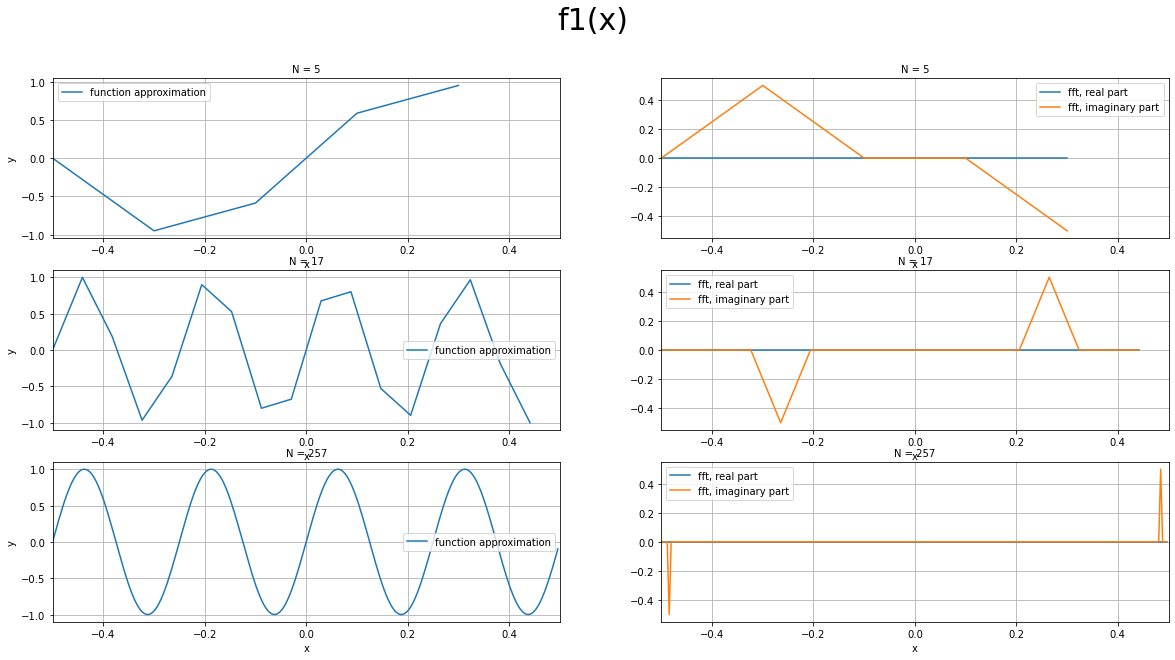

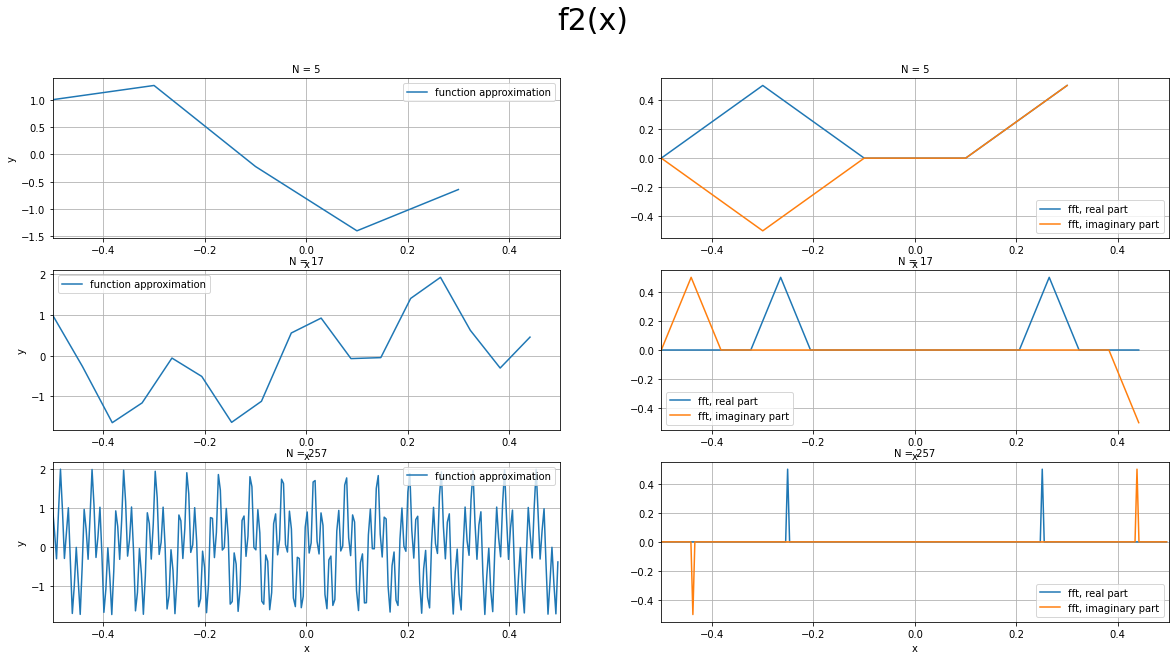

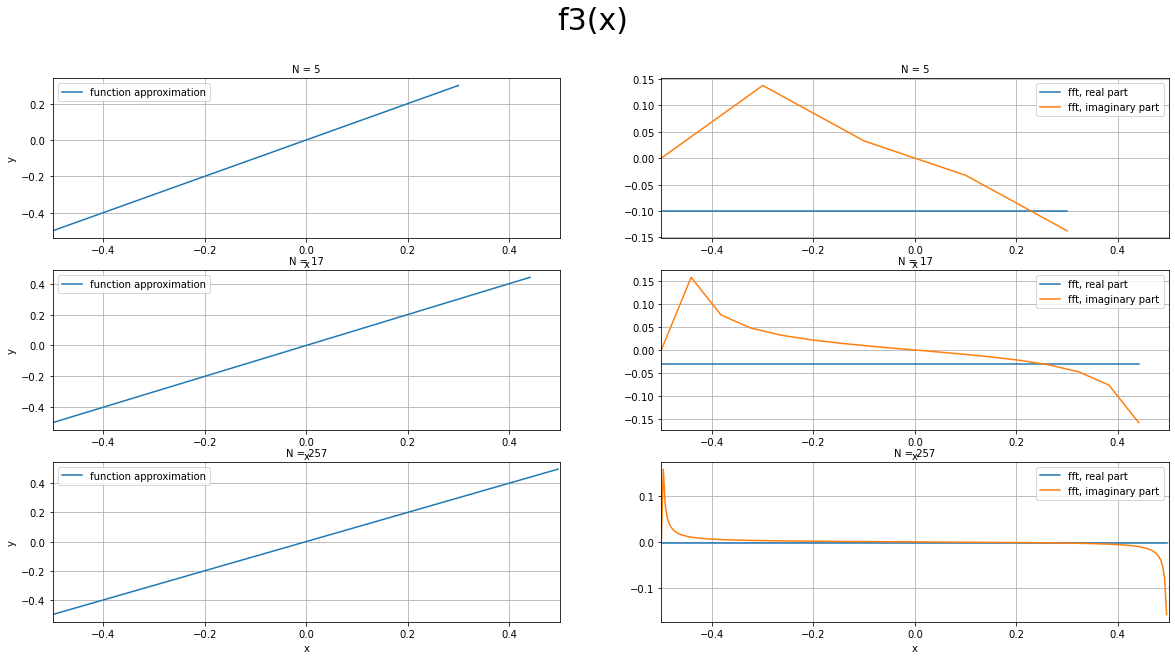

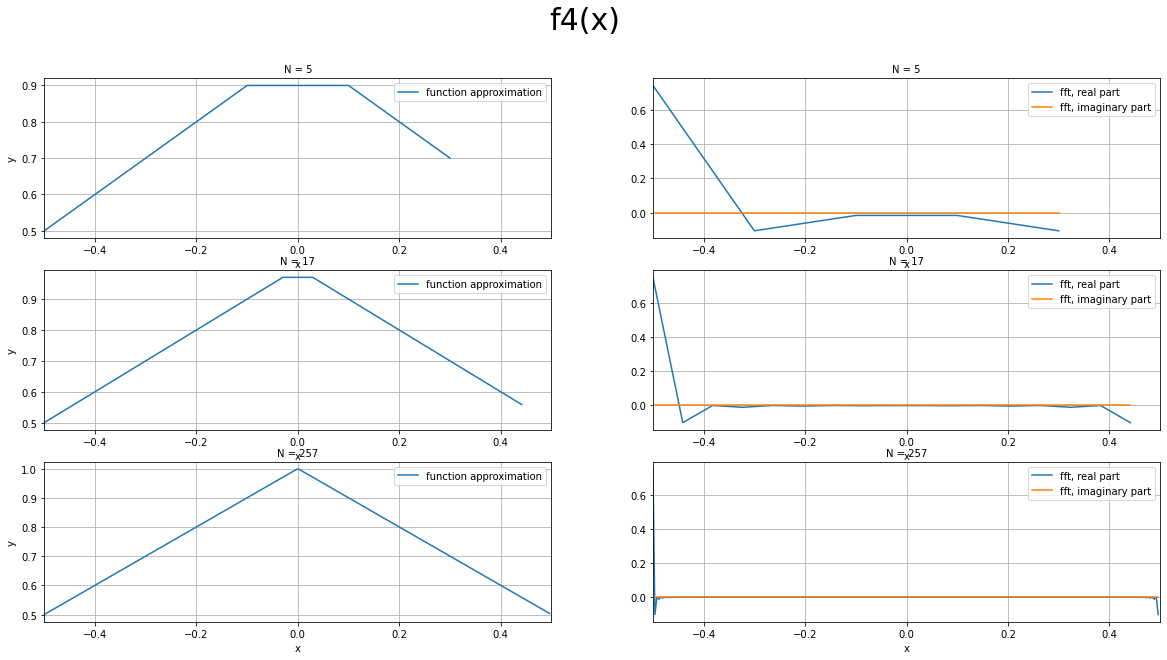

In [3]:
# Def array holding different values of N
N = [5,17,257]

# Def array holding functions
funcs = [f1,f2,f3,f4]



# iterate over all functions
for j,f in enumerate(funcs):
    # Create plot figure
    fig, axs  = plt.subplots(3,2)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    fig.suptitle(f"f{j+1}(x)", fontsize = 30)
    # Iterate over all values of N
    for i,n in enumerate(N):
    
        #Perform DFT
        func,x_vals = transform(f,n,-0.5)
        func_trans = sp.fft.fft(func)/n
    
        # Plot f_hat and f
        axs[i][0].set_title(f"N = {n}", fontsize = 10)
        axs[i][1].set_title(f"N = {n}", fontsize = 10)
        axs[i][0].plot(x_vals,func, label = "function approximation")
        axs[i][1].plot(x_vals,(func_trans).real, label = "fft, real part")
        axs[i][1].plot(x_vals,(func_trans).imag, label = "fft, imaginary part")
        axs[i][0].grid(True)
        axs[i][1].grid(True)
        axs[i][0].set_xlabel("x", fontsize = 10)
        axs[i][1].set_xlabel("x", fontsize = 10)
        axs[i][0].set_xlim(-0.5,0.5)
        axs[i][1].set_xlim(-0.5,0.5)
        axs[i][0].set_ylabel("y", fontsize = 10)
        axs[i][0].set_ylabel("y", fontsize = 10)
        axs[i][0].legend(prop={'size' : 10})
        axs[i][1].legend(prop={'size' : 10})

For the linear functions, namely $f_3 (x)$ and $ f_4(x)$, $\boldsymbol{f}$ approximates our functions reasonably well, especially for $f_3(x)$; this for all values of N. For the other two, it seems we need a quite large N to approximate our function. For $f_1(x)$ and $f_2(x)$, the plots for the two first N-values do not closely resemble the original functions.

#### i) Fourier coefficients with DFT
We start by plotting the $f_2(x)$ after applying fftshift to its fourier transform. Using `fft.fftshift()`, we shift our outputted array containing our fourier transform such that the zero-frequency is centered.

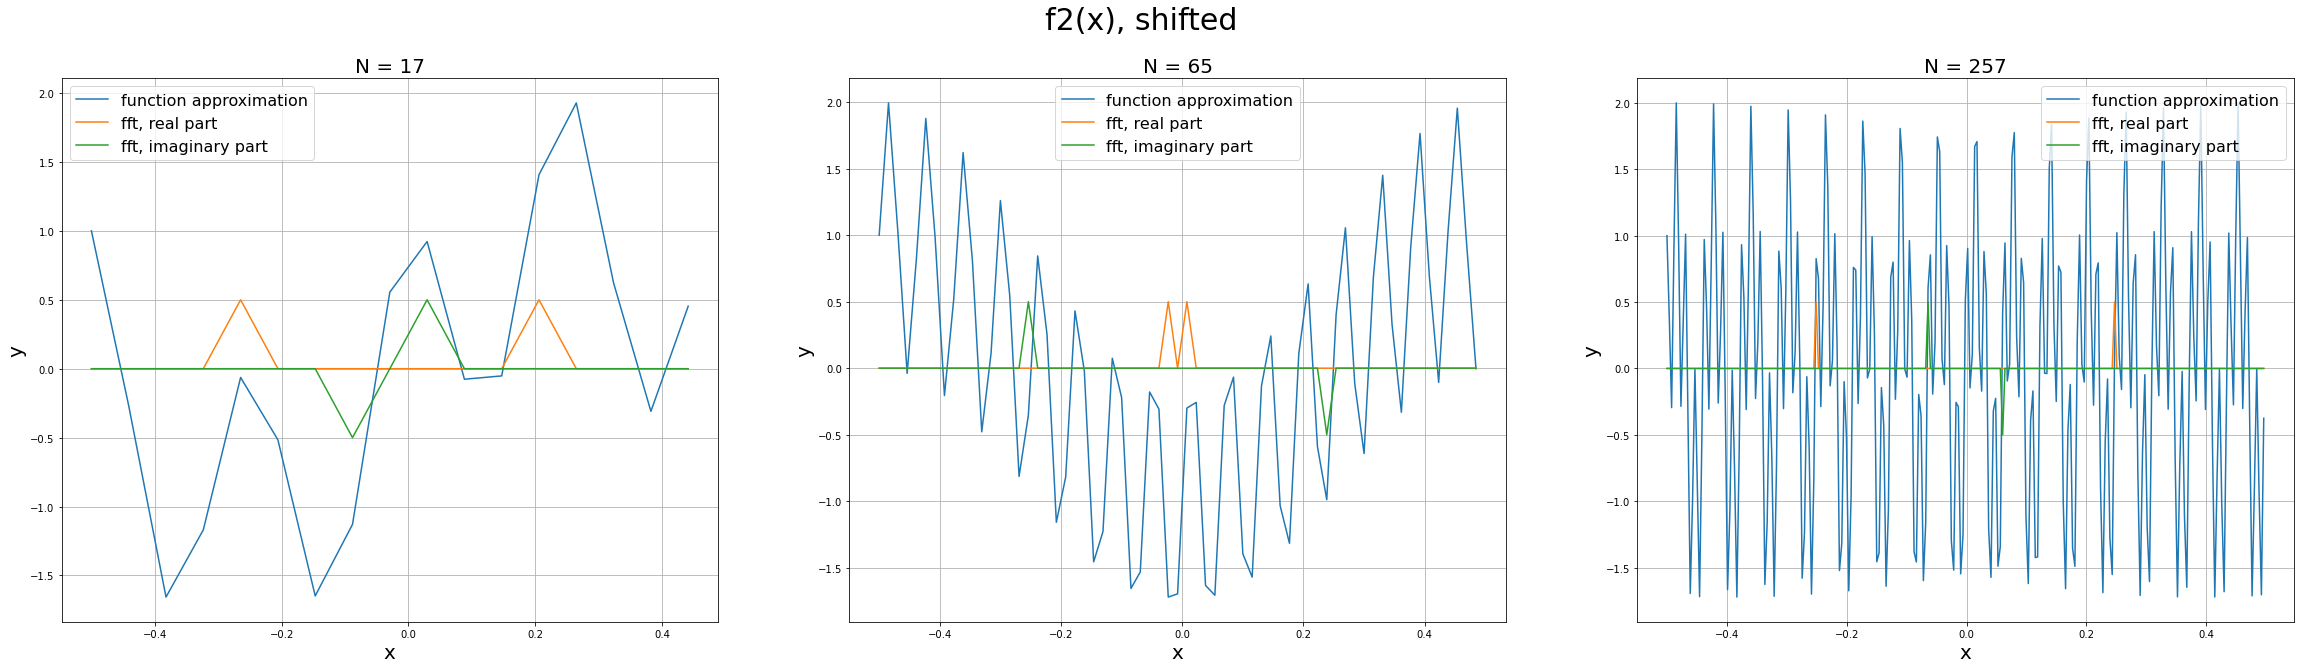

In [4]:
# Def array holding different values of N
N = [17,65,257]

# Create plot figure
fig, axs  = plt.subplots(1,3)
fig.set_figheight(10)
fig.set_figwidth(40)
fig.suptitle("f2(x), shifted", fontsize = 30)

# Iterate over values of N
for i,n in enumerate(N):

    # Perform DFT
    func,x_vals = transform(f2,n, -0.5)
    func_trans = sp.fft.fft(func) / n
    func_trans_shift = sp.fft.fftshift(func_trans)

    # Plot 
    axs[i].set_title(f"N = {n}", fontsize = 20)
    axs[i].plot(x_vals,func, label = "function approximation")
    axs[i].plot(x_vals,(func_trans_shift).real, label = "fft, real part")
    axs[i].plot(x_vals,(func_trans_shift).imag, label = "fft, imaginary part")
    axs[i].grid(True)
    axs[i].set_xlabel("x", fontsize = 20)
    axs[i].set_ylabel("y", fontsize = 20)
    axs[i].legend(prop={'size' : 16})

Furthering our analysis, we want to look at the fourier coefficients of $f_2(x)$.

We start by writing out $a_k$
$$
\begin{aligned}
a_k &= 2 \left< f_2,\cos{(2\pi k \cdot)} \right > = 2\int_{-\frac{1}{2}}^{\frac{1}{2}} f_2(x) \cos{(2\pi k x)} dx \hspace{1cm} , k = 0,1,... , n \\
&= 2\int_{-\frac{1}{2}}^{\frac{1}{2}} \Bigl( \sin(32\pi x) + \cos(128 \pi x)\Bigr) \cos{(2\pi k x)} dx =  2\int_{-\frac{1}{2}}^{\frac{1}{2}} \sin(32\pi x) \cos{(2\pi k x)} + 2\int_{-\frac{1}{2}}^{\frac{1}{2}} \cos(128 \pi x) \cos{(2\pi k x)} \\
&=  \left<\sqrt{2} \sin(32\pi \cdot),\sqrt{2}\cos{(2\pi k \cdot)} \right > + \left<\sqrt{2} \cos(128\pi \cdot),\sqrt{2} \cos{(2\pi k \cdot)} \right > 
\end{aligned}
$$

We do the same for $b_k$:

$$
\begin{aligned}
b_k &= 2 \left< f_2,\sin{(2\pi k \cdot)} \right > = 2\int_{-\frac{1}{2}}^{\frac{1}{2}} f_2(x) \sin{(2\pi k x)} dx \hspace{1cm} , k = 0,1,... , n \\
&= 2\int_{-\frac{1}{2}}^{\frac{1}{2}} \Bigl( \sin(32\pi x) + \cos(128 \pi x)\Bigr) \sin{(2\pi k x)} dx =  2\int_{-\frac{1}{2}}^{\frac{1}{2}} \sin(32\pi x) \sin{(2\pi k x)} + 2\int_{-\frac{1}{2}}^{\frac{1}{2}} \cos(128 \pi x) \sin{(2\pi k x)} \\
&=  \left<\sqrt{2} \sin(32\pi \cdot),\sqrt{2}\sin{(2\pi k \cdot)} \right > + \left<\sqrt{2} \cos(128\pi \cdot),\sqrt{2} \sin{(2\pi k \cdot)} \right > 
\end{aligned}
$$

We recognize these inner products from what we showed in 1 b), and thus we do not need to calculate these integrals to find $a_k$ and $b_k$.

$$
\Rightarrow 
a_k =
\begin{cases}
1& \text{if } k=64,\\
0& \text{else}.
\end{cases},
\hspace{1cm}
b_k =
\begin{cases}
1& \text{if } k=16,\\
0& \text{else}.
\end{cases}
$$

We now want to find an expression for $c_k = \left< f_2,e^{2 \pi i k \cdot} \right>$ where $k = -n, ..., n$; this without calculating its integral. We start by writing out the inner product.


$$
c_k = \left< f_2,e^{2 \pi i k \cdot} \right> = \int_{-\frac{1}{2}}^{\frac{1}{2}} f_2(x) e^{2 \pi i k \cdot}  dx \hspace{1cm} , k = -n,... , n 
$$
Using Euler's identity, we can rewrite $e^{2 \pi i k \cdot}$:

$$
c_k = \int_{-\frac{1}{2}}^{\frac{1}{2}} f_2(x) e^{2 \pi i k \cdot}  dx = \int_{-\frac{1}{2}}^{\frac{1}{2}} f_2(x) \Bigl(\cos(2 \pi k x) + i\sin(2 \pi k x) \Bigr)  dx 
$$
We then put in our expression for $f_2(x)$, and rewrite:
$$
\begin{aligned}
c_k &= \int_{-\frac{1}{2}}^{\frac{1}{2}} \Bigl(\sin(32\pi x) + \cos(128 \pi x)    \Bigr) \Bigl(\cos(2 \pi k x) + i\sin(2 \pi k x) \Bigr) dx \\
&= \int_{-\frac{1}{2}}^{\frac{1}{2}} \sin(32\pi x)\cos(2 \pi k x) dx + \int_{-\frac{1}{2}}^{\frac{1}{2}} \cos(128\pi x)\cos(2 \pi k x) dx + i \Bigl(\int_{-\frac{1}{2}}^{\frac{1}{2}}\sin(32\pi x)\sin(2 \pi k x) dx + \int_{-\frac{1}{2}}^{\frac{1}{2}}\cos(128\pi x)\sin(2 \pi k x) dx \Bigr) \\
&= \left<\sin(32\pi \cdot),\cos(2 \pi k \cdot) \right> + \left<\cos(128\pi \cdot),\cos(2 \pi k \cdot) \right> + i \Bigl( \left<\sin(32\pi \cdot),\sin(2 \pi k \cdot)\right> + \left<\cos(128\pi \cdot),\sin(2 \pi k \cdot)\right >        \Bigr) \hspace{1cm} , k = -n,... , n 
\end{aligned}
$$

We now recognize that the real and imaginary term in $c_k$ is just $\frac{a_k}{2}$ and $\frac{b_k}{2}$ respectively, except that $c_k$ is defined for negative values of $k$, while $a_k$ and $b_k$ are not. Using that $ \cos(-z) = \cos(z)$, $\sin(-z) = - \sin(z)$, and that $\left<\cdot, - \cdot \right> = -\left< \cdot, \cdot \right>$,  we can further rewrite our expression.


$$
c_k = \frac{a_{|k|} - sgn(k) \cdot ib_{|k|}}{2}
$$

Using the expressions for $a_k$ and $b_k$, we can calculate the values of $c_k$:

$$
\Rightarrow 
c_k =
\begin{cases}
\frac{1}{2}& \text{if } k= \pm 64,\\
\mp \frac{i}{2}& \text{if } k= \pm16,\\
0& \text{else}.
\end{cases},
$$


If we now wanted to change our input signal, we could to this by altering the fourier transform of the signal. Here we will do this for $f_2(x)$, trying to remove its second summand. Note that the same idea can be applied for removing the first summand as well. Looking at how we derived our values $c_k(f_2)$, we see that the only contribution of the second summand to $c_k$ is in $a_k$ for $k = 64$, thus only attributing in $c_k$ for $k = \pm 64$. If we now were to be able to alter these values of $c_k$ through $\hat{f}$, we would effectively have removed the second summand of $f_2(x)$. 

In our implementation, we use `fft.fftshift()` to shift our fourier transform of $f_2(x)$, $\hat{f}$, such that the zero-frequency component are centered in the array, while the high frequency signals is pushed to the ends of the array. We will do this for N = 257 points, but first we start by analysing the shifted version of $\hat{f_2}$.

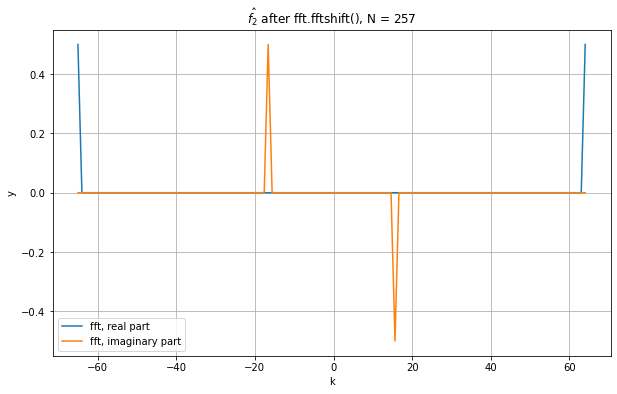

In [5]:
# Define number of sample points
N = 129

# calculate fourier transform, and use fftshift()
func,x_vals = transform(f2,N)
func_trans = sp.fft.fft(func, norm="forward")
func_trans_shift = sp.fft.fftshift(func_trans)

# redefine x_vals to match k-values
x_vals = np.linspace(-N//2,N//2,N)

# Plot
plt.figure(figsize=(10,6))
plt.title("$\hat{f_2}$ after fft.fftshift(), N = 257")
plt.plot(x_vals,(func_trans_shift).real, label = "fft, real part")
plt.plot(x_vals,(func_trans_shift).imag, label = "fft, imaginary part")
plt.xlabel("k")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

As highly suggested from the plot above, if we take the center of the shifted version of $\hat{f_2}$ and index it with k = 0, then we can interpret $\hat{f_2}[k]$ as $c_k$. We note that this interpretation is valid for all N > 128; we will discuss why this is the case later.  Effectively, this means that  `fft.fftshift()` centers our array around $c_0$. This is very useful, as we know which $c_k$ values that represents the frequencies of both the summands of $f_2(x)$, making it easy to remove them; we simply set $c_k = 0$ at our given k-values. Since we know what $f_2(x)$ should look like without its second summand, we do the inverse transform after removing the second summand, and compare it to its known result to confirm our result. 

Text(0, 0.5, 'y')

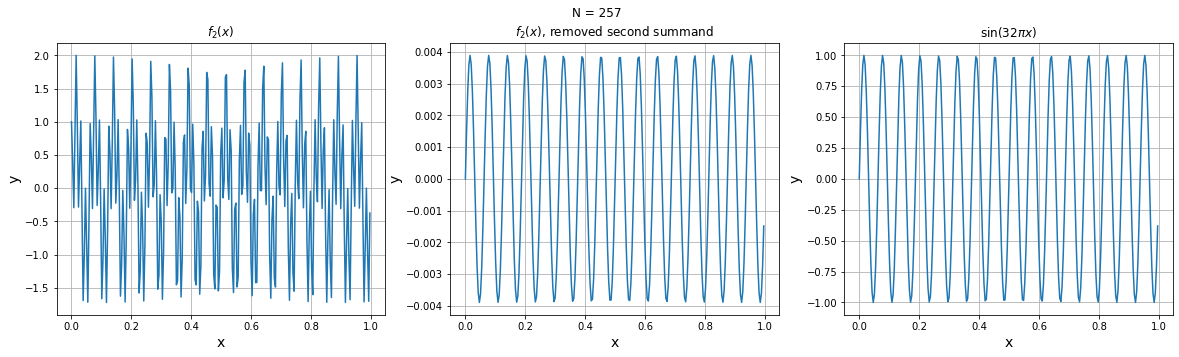

In [6]:
# Def number of sample points
N = 257

# calculate fourier transform, and use fftshift()
func,x_vals = transform(f2,N)
func_trans = sp.fft.fft(func, norm="forward")
func_trans_shift = sp.fft.fftshift(func_trans)

#remove second summand
k = 64
func_trans_shift[(N//2-k)] = 0 
func_trans_shift[(N//2 + k)] = 0

# recreate function
rec = fft.ifft(fft.ifftshift(func_trans_shift)).real

# first summand 
sin = np.sin(32*np.pi*x_vals)

# plot 
fig, axs  = plt.subplots(1,3)
fig.suptitle("N = 257")
fig.set_figheight(5)
fig.set_figwidth(20)
axs[0].set_title("$f_2(x)$")
axs[0].plot(x_vals,func)
axs[0].grid(True)
axs[0].set_xlabel("x", fontsize = 14)
axs[0].set_ylabel("y", fontsize = 14)
axs[1].set_title("$f_2(x)$, removed second summand")
axs[1].plot(x_vals,rec)
axs[1].grid(True)
axs[1].set_xlabel("x", fontsize = 14)
axs[1].set_ylabel("y", fontsize = 14)
axs[2].set_title("$\sin(32 \pi x)$")
axs[2].plot(x_vals, sin)
axs[2].grid(True)
axs[2].set_xlabel("x", fontsize = 14)
axs[2].set_ylabel("y", fontsize = 14)

As we can see, the resulting reconstructed version $f_2(x)$ looks to be equal to the first summand of $f_2(x)$. We could easily compare the numerical values for these two to further affirm that the reconstructed version of $f_2(x)$ is indeed only its first summand. But for what values of N can we do this? Lets start by doing some experimentation, in hopes of gaining some intuition for the problem. We do the same as we did when analysing $\hat{f_2}$, only now for $N = 1025,513,129,65$

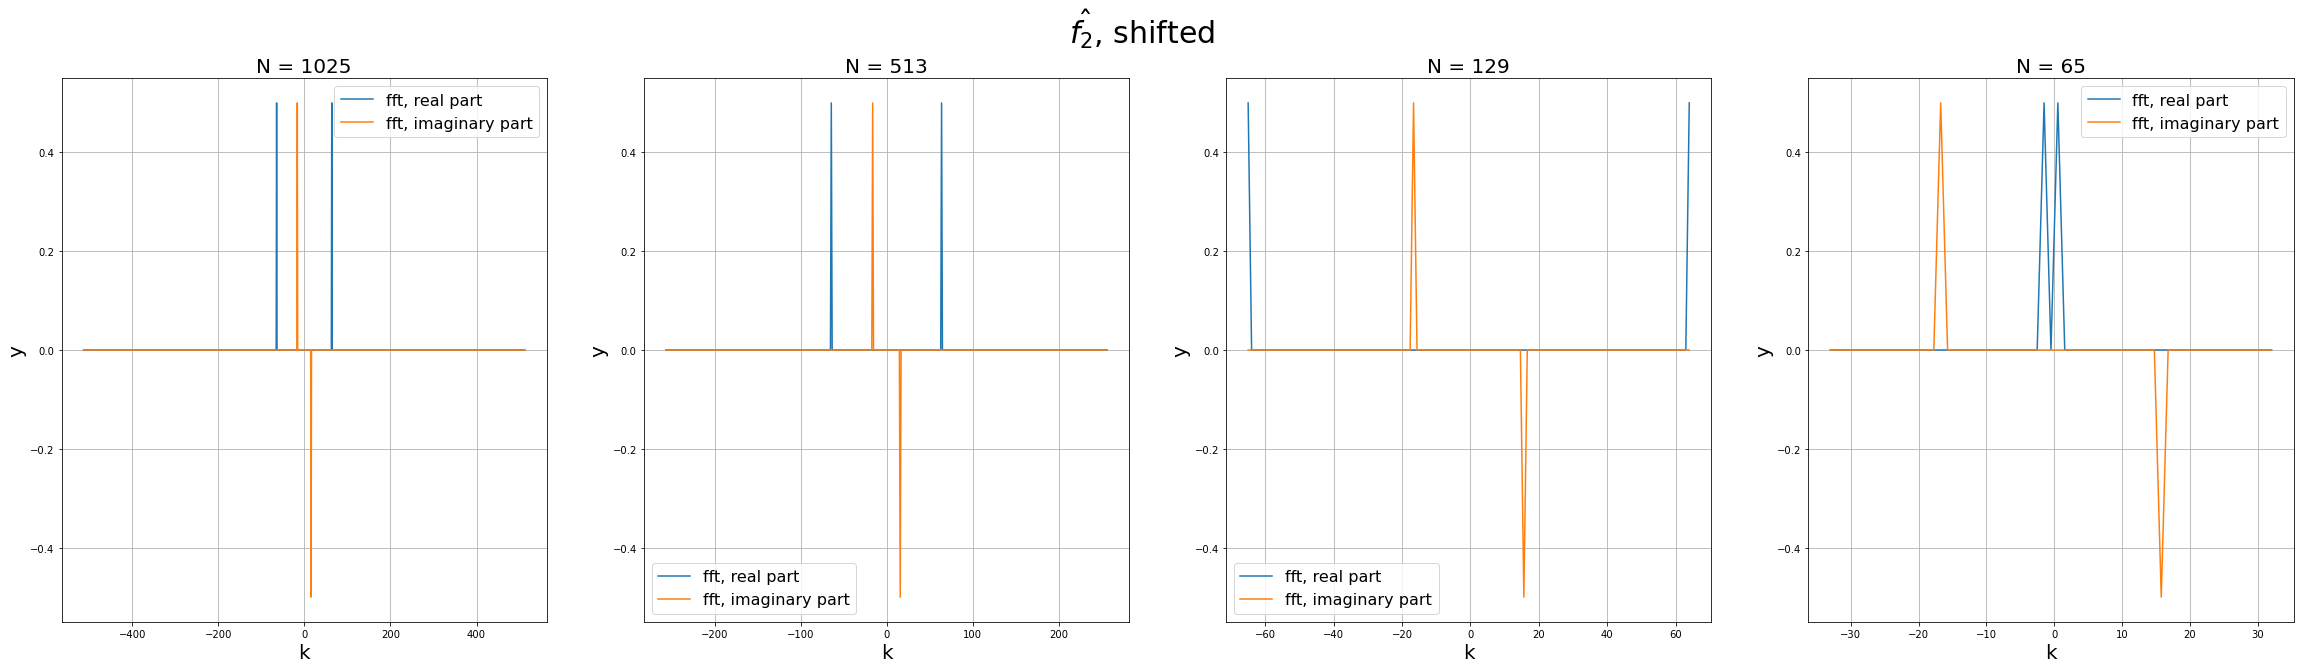

In [7]:
# define N-values
N = [1025,513,129,65]

# plot
fig, axs  = plt.subplots(1,4)
fig.set_figheight(10)
fig.set_figwidth(40)
fig.suptitle("$\hat{f_2}$, shifted", fontsize = 30)
for i,n in enumerate(N):
    func,x_vals = transform(f2,n)
    func_trans = sp.fft.fft(func)/n
    func_trans_shift = sp.fft.fftshift(func_trans)

    # redefine x_vals to match k-values
    x_vals = np.linspace(-n//2,n//2,n)

    axs[i].set_title(f"N = {n}", fontsize = 20)
    axs[i].plot(x_vals,(func_trans_shift).real, label = "fft, real part")
    axs[i].plot(x_vals,(func_trans_shift).imag, label = "fft, imaginary part")
    axs[i].grid(True)
    axs[i].set_xlabel("k", fontsize = 20)
    axs[i].set_ylabel("y", fontsize = 20)
    axs[i].legend(prop={'size' : 16})

As foreshadowed earlier, we see that the interpretation of $\hat{f_2}$ shifted as $c_k$, only seems to be valid for $N > 128$. Remembering that the $c_k$-values representing the second summand have k-values $k = \pm 64$, it is reasonable to conclude that $ N > 2k$ is necessary to remove a frequency with associated values $\pm k$. Consequently, this method can not be applied to cases where $N \leq 2k$. In cases where $N \leq 2k$, one can not assume that $\hat{f}$ shifted equals $\vec{c_k}$

### Task 2 - Using DFT in interpolation

#### a) Aliasing formula

From the given information we know that

$$
\hat{f_k}=\frac{1}{N}\sum_{j=0}^{N-1}f_j e^{-2\pi ijk/N}\, \wedge\, f_j=\sum_{r\in\mathbb{Z}} c_r(f)e^{2\pi i rx_j}\\
\Rightarrow \hat{f_k}=\frac{1}{N}\sum_{j=0}^{N-1}\bigg(\sum_{r\in\mathbb{Z}} c_r(f)e^{2\pi ir x_j} \bigg) e^{-2\pi ijk/N}\\
$$

We know that $x_j=\frac{j}{N}$. Inserting for this, and multiplying the exponentials with each other, we get

$$
\hat{f_k}=\frac{1}{N}\sum_{j=0}^{N-1}\bigg(\sum_{r\in\mathbb{Z}} c_r(f)e^{2\pi i j(r-k)/N}\bigg)\\
$$

Since $c_r(f)$ does not depend on $j$, we can swap the order of the sums and leave $c_r(f)$ outside the sum over $j$.

$$
\Rightarrow \hat{f_k}=\sum_{r\in\mathbb{Z}}\bigg(c_r(f)\frac{1}{N}\sum_{j=0}^{N-1}e^{2\pi i j(r-k)/N}\bigg)\\
$$

From **f)** we know that

$$
\frac{1}{N}\sum_{j=0}^{N-1}e^{2\pi i j(r-k)/N}=
\begin{cases}
1& \text{if } (r-k)\,\text{mod}\,N\equiv 0,\\
0& \text{else},
\end{cases}
\hspace{1cm}
$$

so we only end up with the terms of the first sum where

$$
\frac{r-k}{N}=\ell,\, \ell\in\mathbb{Z}\\
\Rightarrow r=k+\ell N, \, \ell\in\mathbb{Z}
$$

Thus we have proven the aliasing formula, 

$$
\hat{f_k}=\sum_{\ell\in\mathbb{Z}}c_{k+\ell N}(f)\hspace{0.5cm} \square
$$

#### b) Fourier coefficients of shifted functions

We want to prove that $c_k(\tau_N f)=e^{-2\pi i k/N}c_k(f)$. Knowing that $\tau_N f(\cdot)=f(\cdot-\frac{1}{N})$, we have

$$
c_k(\tau_N f(\cdot))=c_k(f(\cdot-\frac{1}{N}))
$$

Since $c_k(f)=\big\langle f,\,e^{2\pi ik \cdot} \big\rangle$, we have

$$
\begin{aligned}
c_k(f(\cdot-\frac{1}{N}))&=\bigg\langle f(\cdot-\frac{1}{N}),\,e^{2\pi ik \cdot} \bigg\rangle\\
&=\bigg\langle f(\cdot-\frac{1}{N}),\,e^{2\pi ik/N} e^{-2\pi ik /N} e^{2\pi ik \cdot} \bigg\rangle\\
&=e^{-2\pi ik /N} \bigg\langle f(\cdot-\frac{1}{N}),\,e^{-2\pi ik/N}  e^{2\pi ik \cdot} \bigg\rangle\\
&=e^{-2\pi ik /N} \bigg\langle f(\cdot-\frac{1}{N}),\, e^{2\pi ik (\cdot-\frac{1}{N})} \bigg\rangle\\
\end{aligned}
$$

In the second last equation, we must take the complex conjugate of $e^{2\pi ik/N}$ as we move it outside the inner product. 

Since both $f$ and $e^{2\pi ik\cdot}$ have the same period, 

$$
\bigg\langle f(\cdot-\frac{1}{N}),\, e^{2\pi ik (\cdot-\frac{1}{N})} \bigg\rangle=
\bigg\langle f(\cdot),\, e^{2\pi ik \cdot} \bigg\rangle.
$$

Thus, we end up with

$$
\begin{aligned}
c_k(\tau_N f)&=e^{-2\pi ik /N} \bigg\langle f(\cdot-\frac{1}{N}),\, e^{2\pi i k(\cdot-\frac{1}{N})} \bigg\rangle\\
&=e^{-2\pi ik/N}c_k(f) \hspace{0.5cm} \square
\end{aligned}
$$

This means that the Fourier coefficients $c_k(f)$ are multiplied by $e^{-2\pi ik/N}$ each time we shift $f$ by $\frac{1}{N}$ to the right. A general formula for the coefficients when we shift the function by $\frac{1}{N}$, $j$ times, is therefore

$$
c_k(\tau_N^jf)=e^{-2\pi ik j/N}c_k(f)
$$

#### c) Span of translates



$$
g\in V_{N,f}\Rightarrow g(x)=\sum_{j=0}^{N-1}a_j f(x-\frac{j}{N})
$$

Next,

$$
\tau_N g(x)=g(x-\frac{1}{N})=\sum_{j=0}^{N-1}a_j f(x-\frac{1}{N}-\frac{j}{N})=\sum_{j=0}^{N-1}a_j f(x-\frac{j+1}{N})
$$

Here we see that $\tau_N g$ is a linear combination of all functions $\big(\tau_N f, \ldots, \tau_N^N f\big)$, and since $\tau_N^N f = f$, we see that $\tau_N g$ is a linear combinations of basis vectors of $V_{N,f}$. Thus, $\tau_N g\in V_{N,f}$.

For $\tau_N g$, each function $f$ in the sum is shifted one to the right, while the coefficients remain "in place". Thus, if we let the functions $f$ remain in place, the coefficients of $\tau_N g$ will be shifted one to the left, i.e.

$$
\boldsymbol{a}(\tau_N g)=\big(a_1, a_2, \ldots, a_{N-1}, a_0 \big)^T
$$

#### d) Circulant matrices 
$$
G = \Big(\big \langle \tau_N^k f,\, \tau_N^j f  \big\rangle\Big)_{k,j=0}^{N-1}
$$

Using the Parseval identity and what we found in task **2b)**, we get

$$
\begin{aligned}
\langle \tau_N^k f,\, \tau_N^j f  \big\rangle&=\sum_{r\in\mathbb{Z}}c_r(\tau_n^kf)\,\overline{c_r(\tau_N^j f)}\\
&=\sum_{r\in\mathbb{Z}} e^{-2\pi i rk/N} c_r(f)\, e^{2\pi i rj/N} \,\overline{c_r(f)}\\
&=\sum_{r\in\mathbb{Z}} e^{-2\pi ir (k-j)/N} c_r(f) \,\overline{c_r(f)}\\
\end{aligned}
$$

Thus, inserting for this in $G$, we get

$$
\begin{aligned}
G &= \Big(\big \langle \tau_N^k f,\, \tau_N^j f  \big\rangle\Big)_{k,j=0}^{N-1}\\
&= \Bigg(\sum_{r\in\mathbb{Z}} e^{-2\pi ir (k-j)/N} c_r(f) \,\overline{c_r(f)}\Bigg)_{k,j=0}^{N-1}\\
\end{aligned}
$$

Here, since $k+1-(j+1)=k-j$, we see that all elements on a diagonal from top left to bottom right are the same. As well, we see that $G_{N-1,j}=G_{0,j+1}$ and that $G_{k,N-1}=G_{k+1,0}$. Thus, it is clear that $G$ is on the form 

$$
G = \Big(b_{(k-j)\,\text{mod}\,N} \Big)_{k,j=0}^{N-1},\hspace{0.5cm} b=\sum_{r\in\mathbb{Z}} c_r(f)\,\overline{c_r(f)}\, e^{-2\pi i r(k-j)/N},
$$

i.e. it is a circulant matrix.

#### e) Fourier coefficients and span of translates
$$
\begin{aligned}
c_k(g)&=\Bigg\langle \sum_{j=0}^{N-1}a_j f(\cdot-\frac{j}{N}), \, e^{2\pi i\cdot} \Bigg\rangle\\
&=\sum_{j=0}^{N-1}a_j\,\Big\langle f(\cdot-\frac{j}{N}),\,e^{2\pi i \cdot} \Big\rangle\\
&=\sum_{j=0}^{N-1}a_j c_k(\tau_N^j f)\\
\end{aligned}
$$

Using what we found in **2b)**, we end up with

$$
c_k(g)=\sum_{j=0}^{N-1}a_j e^{-2\pi ik j/N}c_k( f) = \bigg(\sum_{j=0}^{N-1}a_j e^{-2\pi ik j/N}\bigg)c_k( f)
$$

We let $k=h+zN$, where $z\in\mathbb{Z}$ and $h\in\{0,\ldots,\,N-1\}$. By looking at $\boldsymbol{\hat{a}}$, the discrete Fourier transform of $\boldsymbol{a}$, we see that

$$
\hat{a}_h=\Big(\mathcal{F}_N \boldsymbol{a}\Big)_h=\frac{1}{N}\Big(\sum_{j=0}^{N-1} a_j e^{-2\pi i(k-zN)j/N} \Big)
=\frac{1}{N}\Big(\sum_{j=0}^{N-1} a_j e^{-2\pi ikj/N} \Big).
$$

The last equality follows from the fact that $e^{2\pi i z}=1$ since $z\in\mathbb{Z}$. Thus, we see that for all $k\in\mathbb{Z}$,

$$
c_k(g)=\bigg(\sum_{j=0}^{N-1}a_j e^{-2\pi ik j/N}\bigg)c_k(f)=N\hat{a}_h c_k(f) \hspace{0.5cm}\square
$$

#### f) Proving existence of fundamental interpolant


From the previous task, **2e)**, we know that we can check whether a function $g\in V_{N,f}$ holds by checking $N$ pairs of Fourier coefficients, $c_k(g)$ and $c_k(f)$, $k=h+zN$. Let us assume $I_N(x_j)\in V_{N,f}$. This is then equivalent to saying that

$$
c_k(I_N)=N\hat{a}_h c_k(f)\\
$$

$$
\Rightarrow \sum_{z\in\mathbb{Z}}c_{k}(I_N)=\sum_{z\in\mathbb{Z}} N\hat{a}_h c_{k}(f)\\
\Rightarrow \sum_{z\in\mathbb{Z}}c_{h+zN}(I_N)=N\hat{a}_h\sum_{z\in\mathbb{Z}}  c_{h+zN}(f)\\
$$

Using the Aliasing formula, we know that

$$
\sum_{z\in\mathbb{Z}}c_{h+zN}(I_N)= \hat{I}_N=\frac{1}{N} \sum_{j=0}^{N-1} I_N(x_j)e^{-2\pi i j k/N}.
$$

Thus, inserting for this in the equation above, we end up with

$$
\frac{1}{N} \sum_{j=0}^{N-1} I_N(x_j)e^{-2\pi i j k/N}=N\hat{a}_h\sum_{z\in\mathbb{Z}}  c_{h+zN}(f)\\
$$

$$
\Rightarrow \sum_{z\in\mathbb{Z}}  c_{h+zN}(f) = \frac{1}{N^2\hat{a}_h} \sum_{j=0}^{N-1} I_N(x_j)e^{-2\pi i j k/N},\hspace{0.5cm}\hat{a}_h\neq 0
$$

Here, we know that $N\geq 1$ and that $\hat{a}_h\neq 0$. The sum on the right is equal to $0$ when $j\neq 0$ (by the definition of $I_N(x_j)$), which means that we end up with

$$
\sum_{z\in\mathbb{Z}}  c_{h+zN}(f) =\frac{1}{N^2\hat{a}_h} I_N(x_0)e^{-2\pi i 0 k/N}=\frac{1}{N^2\hat{a}_h}\neq 0.
$$

From our result in **2e)** we have therefore shown that 

$$
I_N(x_j)\in V_{N,f} \hspace{0.3cm}\Rightarrow\hspace{0.3cm} \sum_{z\in\mathbb{Z}}  c_{h+zN}(f)\neq 0,
$$

and that the fundamental interpolant satisfies $\sum_{z\in\mathbb{Z}}c_{h+zN}(I_N)=\frac{1}{N}$ and has coefficients $\hat{a}_h=\frac{1}{N^2 \sum_{z\in\mathbb{Z}} c_{h+zN}(f)}$.

The other way around, if we assume $\sum_{z\in\mathbb{Z}}  c_{h+zN}(f)\neq 0$ for all $h=0,1,\ldots,N-1$, we see that the function $g$ that satisfies

$$
c_k(g)=\frac{c_k(f)}{N\sum_{z\in\mathbb{Z}}c_{h+zN}(f)}
$$

is in $V_{N,f}$ with coefficients $\hat{a}_h=\frac{1}{N^2\sum_{z\in\mathbb{Z}}c_{h+zN}(f)}$, since it satisfies the equality we found in **2e)**. Taking the sum of $c_k(g)=c_{h+zN}(g)$ over $z$, we also see that

$$
\sum_{z\in\mathbb{Z}}c_{h+zN}(g)=\frac{\sum_{z\in\mathbb{Z}}c_{h+zN}(f)}{N\sum_{z\in\mathbb{Z}}c_{h+zN}(f)}=\frac{1}{N}
$$

Thus, we see that if $\sum_{z\in\mathbb{Z}}  c_{h+zN}(f)\neq 0$, a function $g$ with the same properties as the fundamental interpolant, i.e. $\sum_{z\in\mathbb{Z}}c_{h+zN}(g)=\frac{1}{N}$ and $\hat{a}_h=\frac{1}{N^2 \sum_{z\in\mathbb{Z}} c_{h+zN}(f)}$, exists in $V_{N,f}$. Since a function in $V_{N,f}$ is uniquely determined by its coefficients, we can conclude that $g(x)=I_N(x)$, and hence we have proven that

$$
I_N(x_j)\in V_{N,f} \hspace{0.3cm}\iff\hspace{0.3cm} \sum_{z\in\mathbb{Z}}  c_{h+zN}(f)\neq 0 \hspace{0.2cm} \forall \hspace{0.2cm} h= 0, 1, \ldots, N-1.
$$

We now want to find a function $g\in V_{N,f}$ that interpolates $N$ sampling values $s_0, \ldots, s_{N-1}$. This means that we want to have $g(x_j)=s_j$, $j=0,1,\ldots,N-1$. We know that the fundamental interpolant satisfies

$$
I_N(x_j)=
\begin{cases}
1& \text{if } j=0\\
0& \text{else}.
\end{cases}
$$

This means that if we shift $I_N$ by $\frac{k}{N}$ to the right, which we denote by $\tau_N^k I_N(x_j)$, we end up with

$$
\tau_N^k I_N(x_j)=
\begin{cases}
1& \text{if } j=k\\
0& \text{else}.
\end{cases}
$$

If we assume $\sum_{z\in\mathbb{Z}}  c_{h+zN}(f)\neq 0$ such that $I_N(x_j)\in V_{N,f}$, we know from **2c)** that $\tau_N^k I_N(x_j)\in V_{N,f}$. Therefore, a function $g\in V_{N,f}$ that satisfies $g(x_j)=s_j$, $j=0,1,\ldots,N-1$ is

$$
g(x)=\sum_{j=0}^{N-1} s_j\tau_N^j I_N(x)=\sum_{j=0}^{N-1} s_j I_N(x-\frac{j}{N})
$$

#### g) Interpolation algorithm

Next we want to make an algorithm to calculate the coefficients $a_0,\ldots,a_{N-1}$ for our function $g$, 

$$
g(x)=\sum_{j=0}^{N-1} s_j \tau_N^jI_N(x),
$$

which interpolates $s_0,\ldots, s_{N-1}$. First we find the Fourier coefficients of $g(x)$.

$$
\begin{aligned}
c_h(g)&=\bigg\langle \sum_{j=0}^{N-1} s_j \tau_N^j I_N(\cdot),\, e^{2\pi i h\cdot}\bigg\rangle\\
&=\sum_{j=0}^{N-1} s_j c_h(\tau_N^j I_N)\\
&=\sum_{j=0}^{N-1} s_j e^{-2\pi i jh/N} c_h(I_N)
\end{aligned}
$$

From the previous task, **2f)**, we know that the Fourier coefficients of the fundamental interpolant are $\frac{1}{N}$. Inserting for this, and using the definition of discrete Fourier transform, we end up with

$$
c_h(g)=\frac{1}{N}\sum_{j=0}^{N-1} s_j e^{-2\pi i jh/N}=\hat{s}_h
$$

Now, using what we found in **2e)**, we can write

$$
c_h(g)=\hat{s}_h=N\hat{a}_h c_h(f)\Rightarrow \hat{a}_h=\frac{\hat{s}_h}{Nc_h(f)}
$$



After calculating all $\hat{a}_h$, $h=0,1,\ldots,N-1$, we can take the inverse discrete Fourier transform of $\boldsymbol{\hat{a}}$ to find the coefficients $\boldsymbol{a}=(a_0,\ldots, a_{N-1})$. Thus, an algorithm for calculating the coefficients $\boldsymbol{a}=(a_0,\ldots,a_{N-1})$, is:

1) Calculate $\boldsymbol{\hat{a}}=(\hat{a}_0,\ldots,\hat{a}_{N-1})$ using 
$$
\hat{a}_h=\frac{\hat{s}_h}{Nc_h(f)} \hspace{0.2cm}\forall\hspace{0.2cm} h=0,1,\ldots, N-1
$$

2) Calculate $\boldsymbol{a}$, the inverse discrete Fourier transform of $\boldsymbol{\hat{a}}$, using `np.fft.ifft()`.

We implement this algorithm in the function `interpolate()`. Due to our definition of the discrete Fourier transform, where we divide by $N$ when finding the DFT, we must use `norm = "forward"` as input in the `np.fft`-functions. Since we assume our Fourier coefficients in `ckf` are centered, while $\boldsymbol{\hat{a}}$ and $\boldsymbol{\hat{s}}$ are not, we use `fft.fftshift()` to make sure all arrays are in the same "state".

In [8]:
def interpolate(s, ckf):
    """
    Interpolate N datapoints, s_0,...,s_{N-1}.
    Input:
        s:    array containing N datapoints
        ckf:  Fourier coefficients of f
    Output:
        a:    array containing N coefficients
    """
    N = len(s)
    L_2 = len(ckf)

    s_hat = np.fft.fft(s, norm="forward")  # norm = "forward" because of our definition of DFT
    a_hat = s_hat/(L_2*np.fft.fftshift(ckf)[:N])
    return np.fft.ifft(a_hat, norm="forward")

**Remark:** We test this function in task **3b**.

## Task 3 - Applying interpolation to signal decomposition

#### a) The Dirichlet kernel
In this task we start by looking at the Dirichlet kernel, defined as following: 
$$
D_n(x) = \frac{1}{2n + 1} \sum_{j = -n}^n e^{2 \pi i j x}, \hspace{1cm}  n \in \mathbb{N}_0
$$

We wish to find this functions fourier coefficients.


$$
\begin{aligned}
c_k(D_n) &= \left< D_n(\cdot),e^{2 \pi i k \cdot} \right> = \int_{-\frac{1}{2}}^{\frac{1}{2}} D_n(x) e^{-2 \pi i k x}  dx \hspace{1cm} , k \in \mathbb{Z} \\
&=  \int_{-\frac{1}{2}}^{\frac{1}{2}} \frac{1}{2n + 1} \sum_{j = -n}^n e^{2 \pi i j x} \cdot e^{-2 \pi i k x}  dx =\frac{1}{2n + 1} \int_{-\frac{1}{2}}^{\frac{1}{2}}  \sum_{j = -n}^n e^{2 \pi i (j-k) x} dx
\end{aligned}
$$
Since $ k \in \mathbb{Z}$,we know that if $ |k| \leq n$ there is one term at $j = k$ in our sum that gives $e^{2 \pi x (j-k)} = e^0 = 1$, i.e:
$$
c_k(D_n) = \frac{1}{2n + 1} \int_{-\frac{1}{2}}^{\frac{1}{2}}  \sum_{j = -n}^n e^{2 \pi i (j-k) x} = \frac{1}{2n + 1} \int_{-\frac{1}{2}}^{\frac{1}{2}}  \Bigl(\sum_{j = -n, j \neq k}^{n} e^{2 \pi i (j-k) x} \Bigr) + 1 dx
$$

Furthermore, we apply the sum rule of integrals:
$$
\begin{aligned}
c_k(D_n)  &= \frac{1}{2n + 1} \sum_{j = -n, j \neq k}^n \int_{-\frac{1}{2}}^{\frac{1}{2}}  \Bigl(e^{2 \pi i (j-k) x} \Bigr) dx + \frac{1}{2n + 1}\int_{-\frac{1}{2}}^{\frac{1}{2}} 1  dx \\
&= \frac{1}{2n + 1} \sum_{j = -n, j \neq k}^{n}  \frac{1}{2 \pi i(j-k)} e^{2\pi i(j-k)x}\Big|_{-\frac{1}{2}}^{\frac{1}{2}} + \frac{x}{2n + 1}\Big|_{-\frac{1}{2}}^{\frac{1}{2}} \\ 
&= \frac{1}{2n + 1} \Bigl(\sum_{j = -n, j \neq k}^{n}  \frac{e^{\pi i(j-k)} - e^{-\pi i(j-k)}}{2 \pi i(j-k)}  \Bigr) +   \frac{1}{2n + 1}\\ 
&=  \frac{1}{2n + 1} \Bigl(\sum_{j = -n, j \neq k}^{n}  \frac{(e^{\pi i})^{(j-k)} - (e^{-\pi i})^{(j-k)}}{2 \pi i(j-k)}  \Bigr) +   \frac{1}{2n + 1} = \frac{1}{2n + 1}
\end{aligned}
$$


In the last step, we used that $e^{\pi i} = e^{-\pi i} = -1$. For $ |k| > n$, we have that $j-k \neq 0$ for all $j \in -n, \ldots, n$, meaning there is no summand in our sum to "pull out". Thus,

$$
\Rightarrow 
c_k(D_n) =
\begin{cases}
\frac{1}{2n + 1}& \text{if } -n \leq k \leq n,\\
0 & \text{else }
\end{cases}
$$

Now we show that the fundamental interpolant $I_{2n+1}$ exists in $V_{2n+1,D_n}$.

$$
\begin{aligned}
\sum_{z\in\mathbb{Z}}c_{h+(2n+1)z}(D_n)&=(\hat{D_n})_h\\
&= \frac{1}{2n+1} \sum_{j=0}^{2n-1}D_n(\frac{j}{2n+1})e^{-2\pi i hj/(2n+1)}\\
&= \frac{1}{2n+1} \sum_{j=0}^{2n-1}\sum_{k=-n}^n \frac{1}{2n+1} e^{2\pi i k j/(2n+1)}e^{-2\pi i hj/(2n+1)}\\
&= \frac{1}{(2n+1)^2} \sum_{j=0}^{2n-1}\sum_{k=-n}^n e^{2\pi i j (k-h)/(2n+1)}\\
\end{aligned}
$$

From **1f)** we know that the sum is equal to $2n+1$ when $(k-h)\,\text{mod}\,(2n+1)\equiv 0$, and $0$ otherwise. This is only the case when $k=h$. Hence,

$$
\begin{aligned}
\sum_{z\in\mathbb{Z}}c_{h+(2n+1)z}(D_n)=\frac{1}{2n+1}=(\hat{D_n})_h\\.
\end{aligned}
$$

From this it is clear that $\sum_{z\in\mathbb{Z}}c_{h+(2n+1)z}(D_n)\neq 0$, and thus we can conclude that the fundamental interpolant $I_{2n+1}$ exists in $V_{2n+1,D_n}$. 

Now we find its form. From earlier tasks, we know that

$$
\hat{a}_h=\frac{1}{(2n+1)^2 (\hat{D_n})_h},\\
c_k(I_{2n+1})=(2n+1)\hat{a}_h c_k(D_n).
$$

Using this, we get

$$
\begin{aligned}
I_{2n+1}&=\sum_{k\in\mathbb{Z}}c_k(I_{2n+1})e^{2\pi i kx} \\
&=\sum_{k\in\mathbb{Z}}(2n+1)\hat{a}_h c_k(D_n)e^{2\pi i kx} \\
&= \sum_{k\in\mathbb{Z}}\frac{c_k(D_n)}{(2n+1)(\hat{D_n})_h}e^{2\pi i kx}\\
&= \sum_{k\in\mathbb{Z}} c_k(D_n)e^{2\pi i kx} = D_n
\end{aligned}
$$

Thus, we see that the fundamental interpolant in $V_{2n+1,D_n}$ is $D_n$. We implement the Dirichlet kernel, $D_n$, in the function `dirichlet_kernel()` and plot it for $n=5,10,17$. We also plot dots at the Dirichlet kernel's zeroes and the one point where it is $1$ for each value of $n$.

In [9]:
def dirichlet_kernel(n,x):
    """
    Calculate the Dirichlet kernel (D_n) for given values of n and x.
    Input:
        x: x-value
        n: determines size of Dirichlet kernel
    Output:
        Vector containing D_n(x)
    """
    return 1/(2*n+1) * sum([np.exp(2 * np.pi * 1j * k * x) for k in range(-n,n+1)])

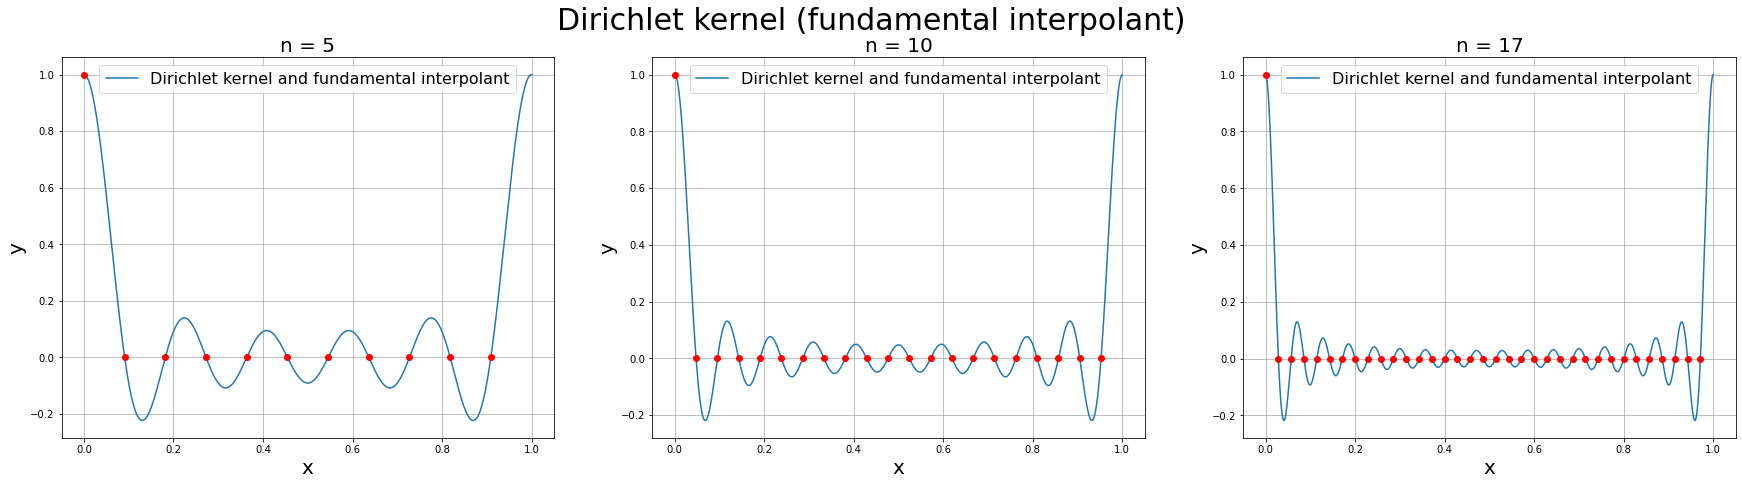

In [10]:
# values of n
n = [5,10,17]

# number of points
N = 200000

# define x-values, without ending points
x = np.linspace(0,1,N, endpoint=False)

# plot
fig, axs  = plt.subplots(1,3)
fig.set_figheight(7)
fig.set_figwidth(30)
fig.suptitle("Dirichlet kernel (fundamental interpolant)", fontsize = 30)

for i,j in enumerate(n):
    func = dirichlet_kernel(j,x)
    axs[i].set_title(f"n = {j}", fontsize = 20)
    axs[i].plot(x, func.real, label = "Dirichlet kernel and fundamental interpolant")

    # plot zeroes and "one" of Dirichlet kernel
    x_known = np.linspace(0,1,2*j+1, endpoint=False)
    y_known = np.zeros(2*j+1)
    y_known[0] = 1
    axs[i].plot(x_known, y_known, "ro")

    axs[i].grid(True)
    axs[i].set_xlabel("x", fontsize = 20)
    axs[i].set_ylabel("y", fontsize = 20)
    axs[i].legend(prop={'size' : 16})

We see that $D_n$ is one in $x=0$, and zero at $2n$ equidistributed points.

#### b) The modified Dirichlet kernel

Now we show that the fundamental interpolant $I_{2n}$ exists in $V_{2n,D_n}$, using the same approach as in **3a)**.

$$
\begin{aligned}
\sum_{z\in\mathbb{Z}}c_{h+2nz}(D_n)&=(\hat{D_n})_h\\
&= \frac{1}{2n} \sum_{j=0}^{2n-1}D_n(\frac{j}{2n})e^{-2\pi i hj/2n}\\
&= \frac{1}{2n} \sum_{j=0}^{2n-1}\sum_{k=-n}^n \frac{1}{2n+1} e^{2\pi i k j/2n}e^{-2\pi i hj/2n}\\
&= \frac{1}{2n(2n+1)} \sum_{j=0}^{2n-1}\sum_{k=-n}^n e^{2\pi i j (k-h)/2n}\\
\end{aligned}
$$

From **1f)** we know that the sum is equal to $2n$ when $(k-h)\,\text{mod}\,2n\equiv 0$, and $0$ otherwise. This is the case twice when $k=\pm n$, as we then can have $h = n$, and get $k-h=0\,\vee\,k-h=2n$. Otherwise, the sum is equal to $2n$ only when $k=h$. Thus, we have

$$
\begin{aligned}
\sum_{z\in\mathbb{Z}}c_{h+2nz}(D_n)=
\begin{cases}
\frac{2}{2n+1}& \text{if } h=\pm n\\
\frac{1}{2n+1}& \text{else}.
\end{cases}
\end{aligned}
$$

From this it is clear that $\sum_{z\in\mathbb{Z}}c_{h+2nz}(D_n)\neq 0$, and thus we can conclude that the fundamental interpolant $I_{2n}$ exists in $V_{2n,D_n}$. 

Now we find its form. From earlier tasks, we know that

$$
\hat{a}_h=\frac{1}{(2n)^2 (\hat{D_n})_h},\\

c_k(D_n)=\frac{1}{2n+1}, \, -n\le k \le n,\\

c_k(I_{2n})=2n\hat{a}_h c_k(D_n).
$$

Using this, we get

$$
\begin{aligned}
I_{2n}&=\sum_{k\in\mathbb{Z}}c_k(I_{2n})e^{2\pi i kx} \\
&=\sum_{k\in\mathbb{Z}}2n\hat{a}_h c_k(D_n)e^{2\pi i kx} \\
&= \sum_{k\in\mathbb{Z}}\frac{c_k(D_n)}{2n(\hat{D_n})_h}e^{2\pi i kx}\\
&= \frac{1}{2n}\sum_{k=-n}^ne^{2\pi i kx}\cdot
\begin{cases}
\frac{1}{2}& \text{if } k=\pm n\\
1& \text{else}.
\end{cases}
\\
&=\frac{1}{2n}\frac{1}{2}(e^{-2\pi i n x} + e^{2\pi i n x})+\frac{1}{2n}\sum_{k=-n+1}^{n-1}e^{2\pi i kx}\\
&= \frac{1}{2n} \cos{(2\pi n x)} + \frac{1}{2n}\sum_{k=-n+1}^{n-1}e^{2\pi i kx}\\
\end{aligned}
$$

This is the modified Dirichlet kernel. The reason for the difference between $I_{2n+1}$ and $I_{2n}$ is that when we only have $2n$ points, we may have $(k-h)\,\text{mod}\,2n\equiv 0$ more than once, which results in a different sum and thus a different result. From our calculations (and by looking at the first step of the derivation), we see that the Fourier coefficients of $I_{2n}$ are

$$
c_k(I_{2n})=
\begin{cases}
\frac{1}{4n} & \text{if } k=\pm n\\
\frac{1}{2n}& \text{else},
\end{cases}
$$

so it is clear that $c_k(I_{2n})\neq c_k(I_{2n+1})$. 

We implement the modified Dirichlet kernel in closed form in the function `mod_dirichlet()`. Then we plot the function, its zeroes and the one point where it is one for $n=5,10,17$.

In [11]:
def mod_dirichlet(n, x):
    """
    Calculate the modified Dirichlet kernel for given values of n and x.
    Input:
        x: x-value
        n: determines size of modified Dirichlet kernel
    Output:
        Vector containing y-values of modified Dirichlet kernel
    """
    return 1/(2*n)*np.cos(2*np.pi*n*x)+1/(2*n)*sum([np.exp(2*np.pi*1j*k*x) for k in range(-n+1, n)])

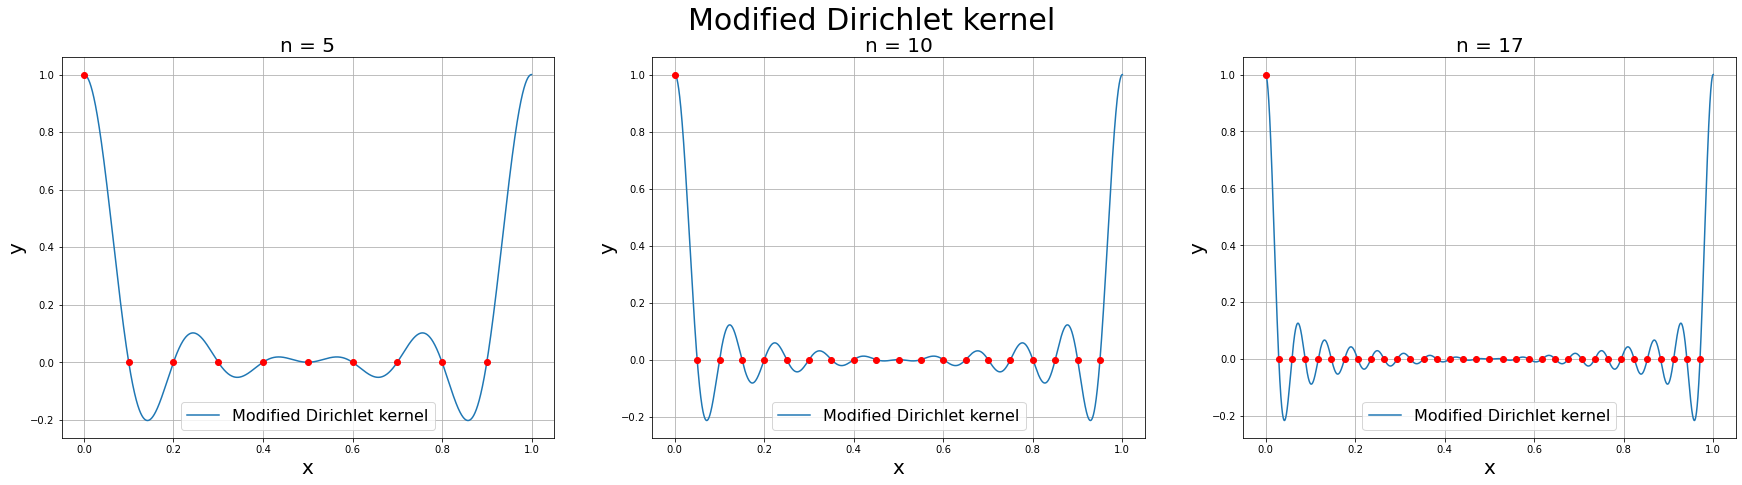

In [12]:
 # values of n
n = [5,10,17]

# number of points
N = 200000 

# Def x-values without ending point
x = np.linspace(0,1,N, endpoint=False)

# plot 
fig, axs  = plt.subplots(1,3)
fig.set_figheight(7)
fig.set_figwidth(30)
fig.suptitle("Modified Dirichlet kernel", fontsize = 30)
 
for i,j in enumerate(n):
    func = mod_dirichlet(j,x)
    ckf = np.full(len(x), 1/(2*j+1)) # Fourier coefficients of D_n
    s = np.zeros(2*j)
    s[0] = 1
    a = interpolate(s, ckf)
    axs[i].set_title(f"n = {j}", fontsize = 20)
    axs[i].plot(x,func.real, label = "Modified Dirichlet kernel")

    # plot zeroes and "one" of modified Dirichlet kernel
    x_known = np.linspace(0,1,2*j, endpoint=False)
    y_known = np.zeros(2*j)
    y_known[0] = 1
    axs[i].plot(x_known, y_known, "ro")

    axs[i].grid(True)
    axs[i].set_xlabel("x", fontsize = 20)
    axs[i].set_ylabel("y", fontsize = 20)
    axs[i].legend(prop={'size' : 16})

Compared to the previous plot, we see that both the modified Dirichlet kernel and the Dirichlet kernel is one when $x=0$, but that they have different amounts of equidistributed zeroes. Whereas $I_{2n+1}$ has $2n$ zeroes, $I_{2n}$ only has $2n-1$.

Next, we want to interpolate a given signal $s_5$ to improve its quality using the modified Dirichlet kernel. To do so, we first use our function from **2g)**, `interpolate()`, to find coefficients $\boldsymbol{a}$ for the signal (which is stored in "signals.csv"). To find the y-values of the interpolated signal $s_6$ we must derive a new algorithm and implement it in a new function, which we call `reconstruct_signal()`. In the algorithm, we use that

$$
\hat{g}_k=\sum_{z\in\mathbb{Z}} c_{h+Nz}(g)=L\hat{a}_h \sum_{z\in\mathbb{Z}}c_{h+Nz}(I_{2n})
$$

where $L$ is the length of the vector $c_k(I_{2n})$.

When doing this we must keep track of the indices, as $c_k(I_{2n})$ is centered and $\hat{a}$ is not. This is fixed by using `fft.fftshift()` on $\boldsymbol{\hat{a}}$ to ensure both are centered. To "de-center" the points that we return, we shift $\hat{g}$ before returning the inverse transformed points.

As well, in order to be able to interpolate more points than in the initial signal $s_5$, we let $c_k(I_{2n})$ have the same length as the amount of interpolation points we wish to create, and adapt $\hat{a}$ to its length by adding zeroes on each side.

The goal is to increase the resolution of $s_5$ by a factor of 4, i.e. we wish to create a new signal $s_6$ with about 4 times as many datapoints as $s_5$. To do so, we let the array of Fourier coefficients be $8n$ long. Since we are still on the interval $[0,1)$, we have $c_k(D_n)=\frac{1}{2n+1}$. After we implement the code, we test it on the signal $s_5$ and plot both $s_5$ and the "improved" signal, $s_6$.

In [13]:
def reconstruct_signal(a, ckf):
    """
    Function to find y-values of interpolated signal
    Input:¨
        a:   array containing coefficients that represent our interpolated signal
        ckf: array with Fourier coefficients of $D_n$
    Output:
        array containing y-values
    """
    # Initiate variables
    N = len(a)
    L = len(ckf)
    zeros = int(L/2 - N/2)

    a_hat = np.zeros(L, dtype=complex) # Initiate â
    a_hat[zeros:zeros+N] = np.fft.fftshift(np.fft.fft(a, norm="forward")) # Center a_hat
    g_hat = L*a_hat*ckf

    return np.fft.ifft(np.fft.fftshift(g_hat), norm="forward")

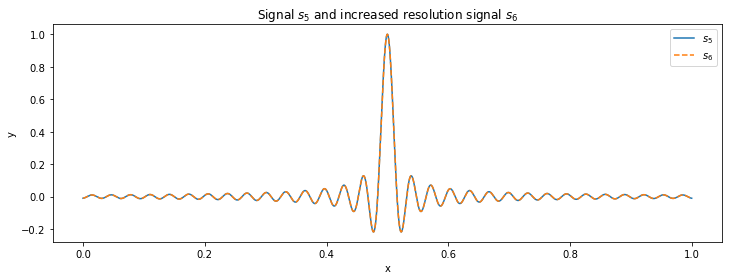

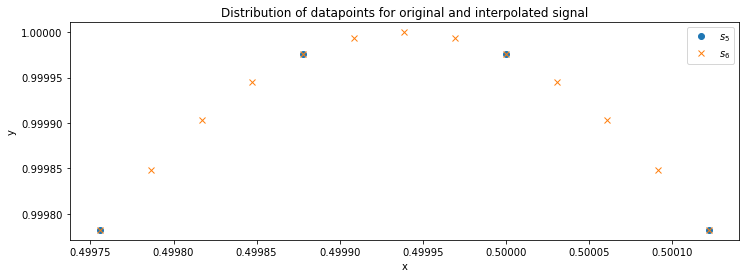

In [14]:
# Fetch datapoints from 'signals.csv'
file = open("project2-data/signals.csv")
signals = file.read().split()
file.close()

# Import signal s5
s5 = np.zeros(len(signals)-1)
for i in range(1, len(signals)):
    s5[i-1] = float(signals[i].split(",")[-1])
    
# Initiate x, x6 and Fourier coefficients (use arange instead of the file-data as the given data is on [0,1], not [0,1)).
n = int(len(s5)/2) # 2n datapoints in s5
x = np.linspace(0, 1, 2*n, endpoint=False)
x6 = np.linspace(0, 1, (2*4*n), endpoint=False) # We want s6 to have 4 times as many datapoints as s5
ckf = np.full(2*4*n, 1/(2*4*n+1))
a = interpolate(s5, ckf)

# Interpolate
s6 = reconstruct_signal(a, ckf).real # Imaginary parts are 0, use np.real to avoid Complex Casting error.

# Plot s_5 and s_6
plt.figure(figsize = (12,4))
plt.plot(x, s5)
plt.plot(x6, s6, "--")
plt.legend(["$s_5$", "$s_6$"])
plt.title("Signal $s_5$ and increased resolution signal $s_6$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Plot close-up of s_5 and s_6
plt.figure(figsize = (12,4))
plt.plot(x[n-2:n+2], s5[n-2:n+2], "o")
plt.plot(x6[4*n-8:4*n+5], s6[4*n-8:4*n+5], "x")
plt.legend(["$s_5$", "$s_6$"])
plt.title("Distribution of datapoints for original and interpolated signal")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We see that the interpolated signal $s_6$ overlaps with $s_5$. Since we freely decide how many points we wish to interpolate for, the increased amount of datapoints for $s_6$ causes for the interpolated curve to be smoother than $s_5$, which indicates that the method of interpolation works well to improve signal quality.

#### c) Subspaces of shifted Dirichlet kernels

As we showed in **2e)**, we can prove that $g=D_\frac{n}{2}\in V_{2n,D_n}$ for even $n$ by confirming that the Fourier coefficients of $D_\frac{n}{2}$ can be written as

$$
c_k(D_\frac{n}{2})=2n\hat{a}_h c_k({D_n}).
$$

Using the formula for Fourier coefficients of the Dirichlet kernel that we found in **3a)**, i.e. that 

$$
c_k(D_n) =
\begin{cases}
\frac{1}{2n + 1}& \text{if } -n \leq k \leq n,\\
0 & \text{else }
\end{cases}\\

c_k(D_\frac{n}{2}) =
\begin{cases}
\frac{1}{n + 1}& \text{if } -\frac{n}{2} \leq k \leq \frac{n}{2},\\
0 & \text{else},
\end{cases}
$$

and inserting for it in the equation above, we get

$$
\frac{1}{n+1} = 2n\hat{a}_h \frac{1}{2n+1}\Rightarrow \hat{a}_h=\frac{2n+1}{2n(n+1)}, \, -\frac{n}{2}\le k \le \frac{n}{2}.
$$

If $|k|>\frac{n}{2}$, the discrete Fourier coefficients of $D_\frac{n}{2}$ are $0$, hence $\hat{a}_h=0,\,|k|>\frac{n}{2}$. Since $h=0,1,\ldots,2n-1$, and $k=h+Nz,\,z\in\mathbb{Z}$, the criteria $-\frac{n}{2}\le k \le \frac{n}{2}$ is the same as

$$
\hat{a}_h=
\begin{cases}
\frac{2n+1}{2n(n + 1)}& \text{if } h = 0, 1, \ldots, \frac{n}{2}, \frac{3}{2}n, \ldots, 2n-1\\
0 & \frac{n}{2} < h < \frac{3}{2}n.
\end{cases}
$$

From this it is clear that $\boldsymbol{\hat{a}}$ exists, and since $\boldsymbol{a}=2n\overline{\mathcal{F}_N}\boldsymbol{\hat{a}}$, we can conclude that there exists coefficients $\boldsymbol{a}=(a_0,\ldots, a_{2n-1})$ such that

$$
c_k(D_\frac{n}{2})=2n\hat{a}_h c_k({D_n}),
$$

which means that $D_\frac{n}{2}\in V_{2n,D_n}$ for even $n$. Looking at a translate of $D_\frac{n}{2}$, we have

$$
D_\frac{n}{2} = \sum_{j=0}^{2n-1} a_j D_n(x-\frac{j}{2n})\\
\Rightarrow \tau_n^q D_\frac{n}{2}=\tau_{2n}^{2q} D_\frac{n}{2}(x)=\sum_{j=0}^{2n-1} a_j\tau_{2n}^{j+2q} D_n(x)\in V_{2n,D_n}
$$

since $D_n$ is periodic s.t. $\tau_{2n}^{2n+j}=\tau_{2n}^j$. Thus, we see that a function $g\in V_{n,D_{n/2}}$ can be written as a linear combination of each second shifted version of $D_n,$ hence we conclude that $V_{n,D_{n/2}}\subset V_{2n,D_n}$.

#### d) Orthogonal subspaces

We now want to find a space $W_{n,E_\frac{n}{2}}\subset V_{2n,D_n}$ s.t. 

$$
\langle f,g \rangle=0 \hspace{0.2cm}\forall\hspace{0.2cm} f\in V_{2n,D_n},\, g\in W_{n,E_\frac{n}{2}}
$$

If we let $E_\frac{n}{2}$ be defined by

$$
c_{h+Nz}(E_\frac{n}{2})=N \hat{b}_h c_{h+Nz}(D_n),
$$

we get

$$
\big\langle \sum_{j=0}^{n-1} b_j \tau_{n}^q E_\frac{n}{2},\, \sum_{h=0}^{n-1} a_h \tau_{n}^r D_\frac{n}{2} \big\rangle
= \sum_{j=0}^{n-1} b_j \sum_{h=0}^{n-1} \overline{a_h}\, \big\langle \tau_{n}^q E_\frac{n}{2},\, \tau_{n}^r D_\frac{n}{2} \big\rangle
$$

Thus, if we can prove that 

$$
\big\langle \tau_n^q E_{\frac{n}{2}},\, \tau_n^rD_{\frac{n}{2}}\big\rangle = 0,
$$

we know that $V_{n,D_{n/2}}$ and $W_{n,E_{n/2}}$ are orthogonal. Orthogonality is preserved in Fourier transforms, so (using Parseval's identity) we get

$$
\begin{aligned}
\big\langle \tau_n^q E_{\frac{n}{2}},\, \tau_n^rD_{\frac{n}{2}}\big\rangle &= \sum_{k\in\mathbb{Z}}c_k(\tau_n^q E_\frac{n}{2}) \, \overline{c_k(\tau_n^r D_\frac{n}{2})}.\\
\end{aligned}
$$

We know the Fourier coefficients of the two functions are

$$
c_k(\tau_n^q E_\frac{n}{2}) = e^{-2\pi i qk/n}c_k(E_\frac{n}{2}) = e^{-2\pi i qk/n} N \hat{b}_h c_k(D_n)
$$

$$
\overline{c_k(\tau_n^r D_\frac{n}{2})} = e^{2\pi i rk/n}\overline{c_k(D_\frac{n}{2})}=e^{2\pi i rk/n} N \overline{\hat{a}_h} \overline{c_k(D_n)}
$$

In the previous tasks we found that $\hat{a}$ and $c_k(D_n)$ are real, so their complex conjugates are the same as themselves. Thus, we get

$$
\begin{aligned}
\big\langle \tau_n^q E_{\frac{n}{2}},\, \tau_n^rD_{\frac{n}{2}}\big\rangle &= \sum_{k\in\mathbb{Z}} e^{-2\pi i qk/n} N \hat{b}_h c_k(D_n) e^{2\pi i rk/n} N \hat{a}_h c_k(D_n)\\
&=  \sum_{z\in\mathbb{Z}}\sum_{h=0}^{2n-1} \hat{a}_h\hat{b}_he^{2\pi i (r-q)(h+Nz)/n} N^2 c_{h+Nz}(D_n)^2.\\
\end{aligned}
$$

Using $\hat{b}_h=\hat{a}_{(h+n)\,\text{mod}\,2n} e^{-h\pi i/n}$, the expression becomes

$$
\begin{aligned}
\sum_{z\in\mathbb{Z}}\sum_{h=0}^{2n-1}\hat{a}_h\hat{a}_{(h+n)\,\text{mod}\,2n}e^{\pi i (2(r-q)(h+Nz)-h)/n} N^2 c_{h+Nz}(D_n)^2\\
=\sum_{z\in\mathbb{Z}}\sum_{h=0}^{2n-1}\hat{a}_h\hat{a}_{(h+n)\,\text{mod}\,2n}e^{\pi i (2rh-2qh+2rNz-2qNz-h)/n} N^2 c_{h+Nz}(D_n)^2\\
=\sum_{z\in\mathbb{Z}}\sum_{h=0}^{2n-1}\hat{a}_h\hat{a}_{(h+n)\,\text{mod}\,2n}e^{\pi i (2rh-2qh+2rNz-2qNz-h)/n} N^2 c_{h+Nz}(D_n)^2\\
=\sum_{z\in\mathbb{Z}}\sum_{h=0}^{2n-1}\hat{a}_h\hat{a}_{(h+n)\,\text{mod}\,2n}e^{\pi i (2rh-2qh-h)/n}e^{4\pi i (rz-qz)} N^2 c_{h+Nz}(D_n)^2\\
=\sum_{z\in\mathbb{Z}}\sum_{h=0}^{2n-1}\hat{a}_h\hat{a}_{(h+n)\,\text{mod}\,2n}e^{\pi i h(2r-2q-1)/n} N^2 c_{h+Nz}(D_n)^2\\
\end{aligned}
$$

Looking at $\boldsymbol{\hat{a}}$ (from task **3c**),

$$
\hat{a}_h=
\begin{cases}
\frac{2n+1}{2n(n + 1)}& \text{if } h = 0, 1, \ldots, \frac{n}{2}, \frac{3}{2}n, \ldots, 2n-1\\
0 & \frac{n}{2} < h < \frac{3}{2}n,
\end{cases}
$$

we see that when $h\neq \frac{n}{2}$ and $h\neq \frac{3n}{2}$, $\hat{a}_{(h+n)\,\text{mod}\,2n}=0$ iff $\hat{a}\neq 0$ and $\hat{a}=0$ iff $\hat{a}_{(h+n)\,\text{mod}\,2n}\neq 0$, which means that 

$$
\hat{a}_h\hat{a}_{(h+n)\,\text{mod}\,2n}=0,\hspace{0.2cm} h = 0,1,\ldots, \frac{n}{2}-1,\, \frac{3n}{2}+1,\ldots, 2n-1.
$$

When $h=\frac{n}{2}$ or $h=\frac{3n}{2}$, however, this is not the case. In these cases, we end up with $(\frac{n}{2}+n)\,\text{mod}\,2n=\frac{3n}{2}$ and $(\frac{3n}{2}+n)\,\text{mod}\,2n=\frac{n}{2}$, which gives

$$
\begin{aligned}
\big\langle \tau_n^q E_{\frac{n}{2}},\, \tau_n^rD_{\frac{n}{2}}\big\rangle&=\\
\sum_{z\in\mathbb{Z}}N^2 c_{h+Nz}(D_n)^2 \hat{a}_\frac{n}{2}\hat{a}_{\frac{3n}{2}}  \Big(e^{\pi i (2r-2q-1)\frac{n}{2}/n}+e^{\pi i \frac{3n}{2}(2r-2q-1)/n}\Big)\\
&=\sum_{z\in\mathbb{Z}}N^2 c_{h+Nz}(D_n)^2 \hat{a}_\frac{n}{2}\hat{a}_{\frac{3n}{2}}  \Big(e^{\frac{\pi}{2}i (2r-2q-1)}+e^{\frac{3\pi}{2}i (2r-2q-1)}\Big)\\
\end{aligned}
$$

In the exponent, we see that $2r-2q-1$ always is odd, so we write $2r-2q-1=2t+1$. Thus, using $e^{\pi i/2}=i$ and $e^{3\pi i/2}=-i$, we get

$$
\begin{aligned}
\big\langle \tau_n^q E_{\frac{n}{2}},\, \tau_n^rD_{\frac{n}{2}}\big\rangle&=\sum_{z\in\mathbb{Z}}N^2 c_{h+Nz}(D_n)^2 \hat{a}_\frac{n}{2}\hat{a}_{\frac{3n}{2}}  \Big((i)^{2t+1}+(-i)^{2t+1}\Big)\\
&=\sum_{z\in\mathbb{Z}}N^2 c_{h+Nz}(D_n)^2 \hat{a}_\frac{n}{2}\hat{a}_{\frac{3n}{2}}  \Big(i(i)^{2t}+(-i)(-i)^{2t}\Big)\\
&=\sum_{z\in\mathbb{Z}}N^2 c_{h+Nz}(D_n)^2 \hat{a}_\frac{n}{2}\hat{a}_{\frac{3n}{2}}  \Big(i(i)^{2t}-i(i)^{2t}\Big)\\
&= 0
\end{aligned}\\
$$

Thus, we have proven that  

$$
\big\langle \tau_n^q E_{\frac{n}{2}},\, \tau_n^rD_{\frac{n}{2}}\big\rangle = 0 \hspace{0.2cm} \forall \hspace{0.2cm} q,r\in\mathbb{Z}
$$

which implies that

$$
\langle g,f \rangle=0 \hspace{0.2cm}\forall\hspace{0.2cm} f\in V_{2n,D_n},\, g\in W_{n,E_\frac{n}{2}},
$$

and hence $V_{n,D_{n/2}}$ and $W_{n,E_{n/2}}$ are orthogonal with $E_\frac{n}{2}$ defined as in the task.

Now we want to show that the translates $\tau_N^j E_\frac{n}{2}$, $j= 0,1,\ldots, n-1$ are linearly independent. We remember that in **2d)** we derived a statement for when the translates are linearly independent.

$$
\sum_{s\in\mathbb{Z}} | c_{l+sN}(f) |^2 > 0, \hspace{0.3cm} l = 0,1,\ldots,N-1
$$

We are now looking at $E_{\frac{n}{2}}$. The $N$ from the inequality above becomes $\frac{n}{2}\cdot 2 = n$ in this case.

$$
\sum_{s\in\mathbb{Z}} | c_{l+sn}(E_{\frac{n}{2}}) |^2 = 
\sum_{s\in\mathbb{Z}} | N^2\hat{b}_{l+sn} c_{l+sn}(D_n) |^2 \\=
N^2 \sum_{s\in\mathbb{Z}} |\hat{a}_{(l+sn)\,\text{mod}\, N} e^{-(h+sn) \pi i/n} c_{l+sn}(D_n) |^2 =
N^2 \sum_{s\in\mathbb{Z}} |\hat{a}_{(l+sn)\,\text{mod}\, 2n}|^2|c_{l+sn}(D_n) |^2
$$

For our sum to be greater than zero we need at least one non-zero term, for every 
$l\in\{0,1,\ldots,2n-1\}$. We remember the coefficients $c_k(D_n)$ form **3a)**.

$$
c_{l+sn} > 0 \iff -n\leq l+sn \leq n
$$

When $l\in\{0,1,\ldots,n\}$, we can fix $s=0$ such that this holds. Similarly when $l\in\{n+1,2n-1\}$, we can fix $s=-1$ such that this holds. Looking at $\hat{a}_{(l+sn)\,\text{mod}\, 2n}$ we remember from **3c)** that

$$
\hat{a}_{(l+sn)\,\text{mod}\, 2n} > 0 \iff -n\leq (l+sn)\, \text{mod}\, 2n\leq n
$$

The same argument holds here as for $c_k(D_n)$. Depending on $l$, we can fix $s=0$ or $s=-1$, just as for $c_k(D_n)$. Critically, these intervals overlap. When $l\in\{0,1,\ldots,n\}$ we look at $s=-1$ else, we look at $s=0$. Consequently, whatever $l$ we are considering, there are always terms where the two factors in the sum both are non-zero. Hence there are no values of $l$ that result in a sum of only zeros. Therefore, we must have

$$
\sum_{s\in\mathbb{Z}} | c_{l+sn}(E_{\frac{n}{2}}) |^2 > 0 \,\, \forall \, l\in\{0,1,\ldots,2n-1\} \iff \{\tau_n^j E_{\frac{n}{2}}\}_{j=0,1,\ldots,2n-1}
\,\, \text{lin. indep.}
$$

#### e) Signal decomposition into subspaces

We will now attempt to put our previous discussions into practice. Using the space $V_{2n,D_n}$ we want to project the given data given in `signals.csv`, onto the subspaces $V_{\frac{n}{2^{j-1}},D_{\frac{n}{2^j}}}$ and $W_{\frac{n}{2^j},E_{\frac{n}{2^j}}}$ 

For $V_{\frac{n}{2^{j-1}},D_{\frac{n}{2^j}}}$, the process becomes fairly simple when using our previous results. Firstly we sample $\frac{2n}{n^j}$ datapoints from the signal, then we compute the Fourier coefficients of the Dirichlet kernel. Using our previously defined function `interpolate()`, we find the coefficients corresponding to the different translates in the relevant space. Using `create_g()` we can then construct the projected function.

For $W_{\frac{n}{2^{j-1}},E_{\frac{n}{2^j}}}$ we can utilize the result from **3d)**, i.e. the orthogonality of $V_{n,D_{\frac{n}{2}}}$ and $W_{n,E_{\frac{n}{2}}}$. Our result states that $V_{n,D_{\frac{n}{2}}} = (W_{n,E_{\frac{n}{2}}})^\perp$. We already know that $\text{dim}(V_{n,D_{\frac{n}{2}}}) = \text{dim}(W_{n,E_{\frac{n}{2}}}) = n$. So the spaces are orthogonal, together they have dimension $2n$, and they are both subspaces of $V_{2n,D_n}$. Therefore we must have 
$$
V_{n,D_{\frac{n}{2}}} \oplus W_{n,E_{\frac{n}{2}}} = V_{2n,D_n}
$$

Since this is a direct sum, given $f_1 \in V_{n,D_{\frac{n}{2}}}$ and $f_2 \in V_{2n,D_n}$, we can simply compute our function, $g_1 \in W_{n,E_{\frac{n}{2}}}$, by subtraction: $g_1 = f_2 - f_1$.

We calculate the projection of the signals from the data, using the discussion above.

In [15]:
def project_signal(x, signal, n, j, W = False):
    """
    Projects signal onto V_{2n, D_n}- or W_{2n, D_n}-spaces.
    Using the dirichlet interpolate()-function and create_g()-function

    Input:
        x:      x-values of signal
        signal: y-values of signal
        n:      1/2 of dimension of space
        j:      number of times dimension of space is divided (j = 0 ==> dimension = 2n)
        W:      whether or not signal is projected to W-space (True ==> W, False ==> V)
    Output:
        x_vals:    array containing x-values of projected signal
        g:         array containing y-values of projected signal
    """
    # Finds dimension
    n = n/(2**j)
    N = 2*n

    # Samples signal
    signal_n = signal[::int(len(signal)/N)]
    x_vals = np.linspace(0, 1, 10**3)

    # Coefficients of the Dirichlet kernel
    ckf = np.full(len(x_vals), 1/(2*n+1), dtype=np.complex64)


    if W:
        # Decreasing n by factor of 2
        n_j = int(n/2)
        signal_nj = signal[::int(len(signal)/(2*n_j))]

        # Coefficients of the Dirichlet kernel
        ckf2 = np.full(len(x_vals), 1/(2*n_j+1), dtype=np.complex64)

        # Finds coefficients for functions
        a = interpolate(signal_n, ckf)
        a2 = interpolate(signal_nj, ckf2)
        
        # Creates function using coefficients
        g = reconstruct_signal(a, ckf)
        g2 = reconstruct_signal(a2, ckf2)

        # Calculates function in W-space
        g -= g2

    else:

        # Finds coefficients for function
        a = interpolate(signal_n, ckf)

        # Creates function using coefficients
        g = reconstruct_signal(a, ckf)

    return x_vals, g



def get_signals(n_signals):
    """
    Imports datafile with signals.

    Input:
        n_signals: nr. of signals to be imported
    Output:
        x:       x_values of signals
        signals: array where each row is a signal
    """
    # Open file and importing data
    file = open("project2-data/signals.csv")
    signals_raw = file.read().split()
    file.close()

    # Sorting into array
    N_s = len(signals_raw)-1
    signals = np.zeros((n_signals, N_s))
    x = np.zeros(N_s)
    for j in range(n_signals):
        for i in range(1, N_s+1):
            signals[j][i-1] = float(signals_raw[i].split(",")[j+1])
            if not j:
                x[i-1] = float(signals_raw[i].split(",")[0])
    return x, signals

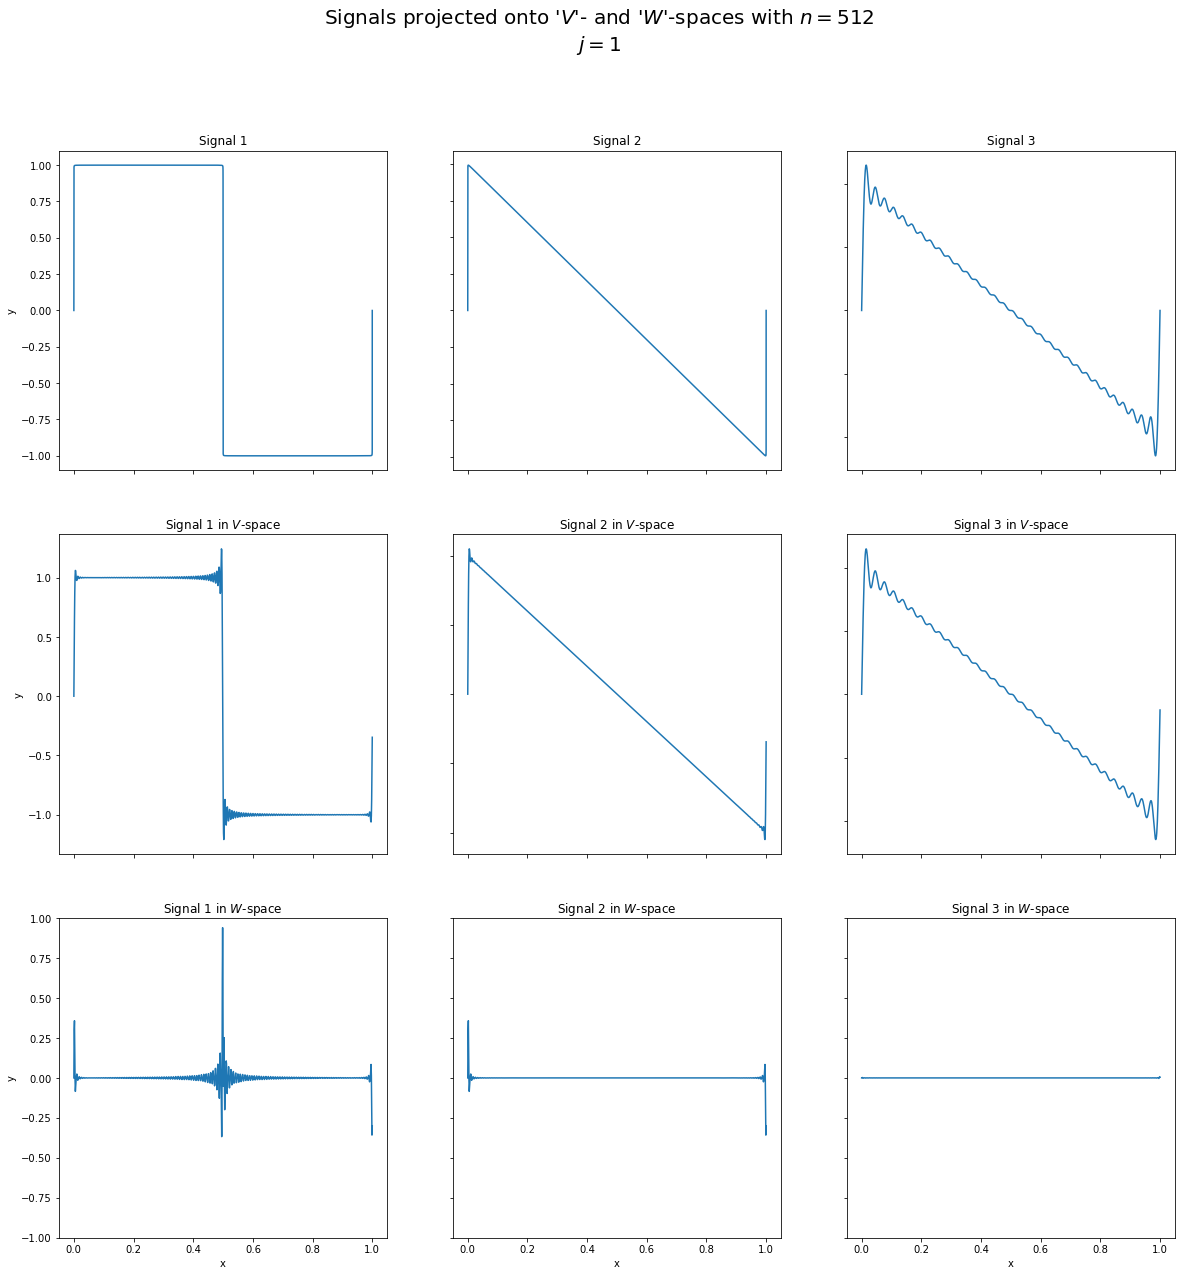

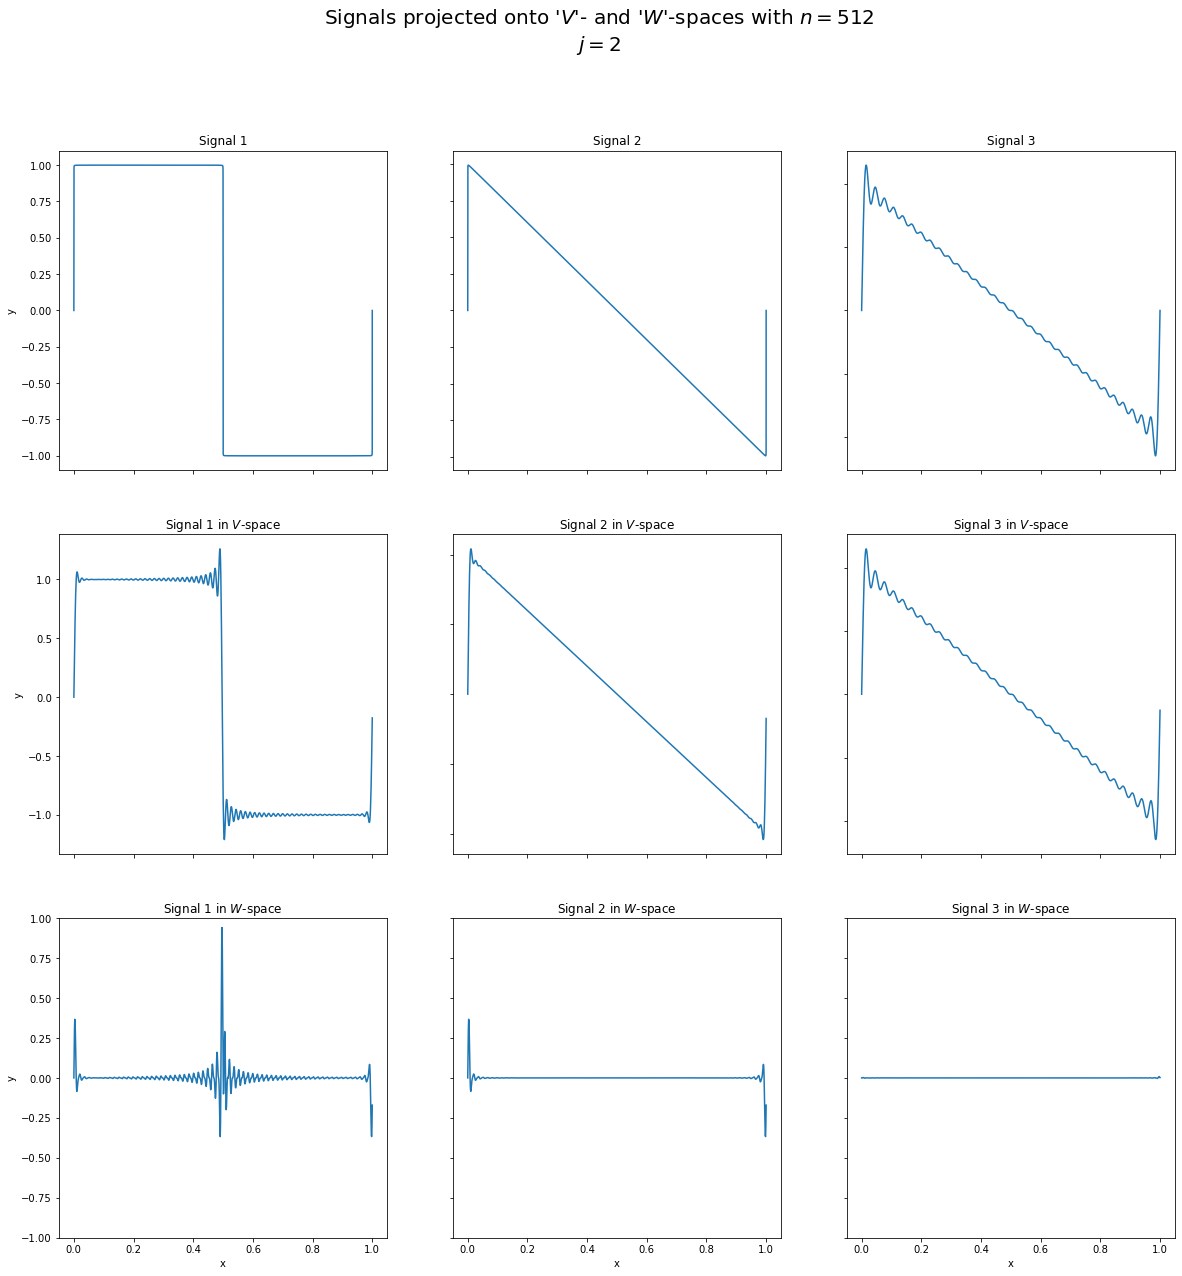

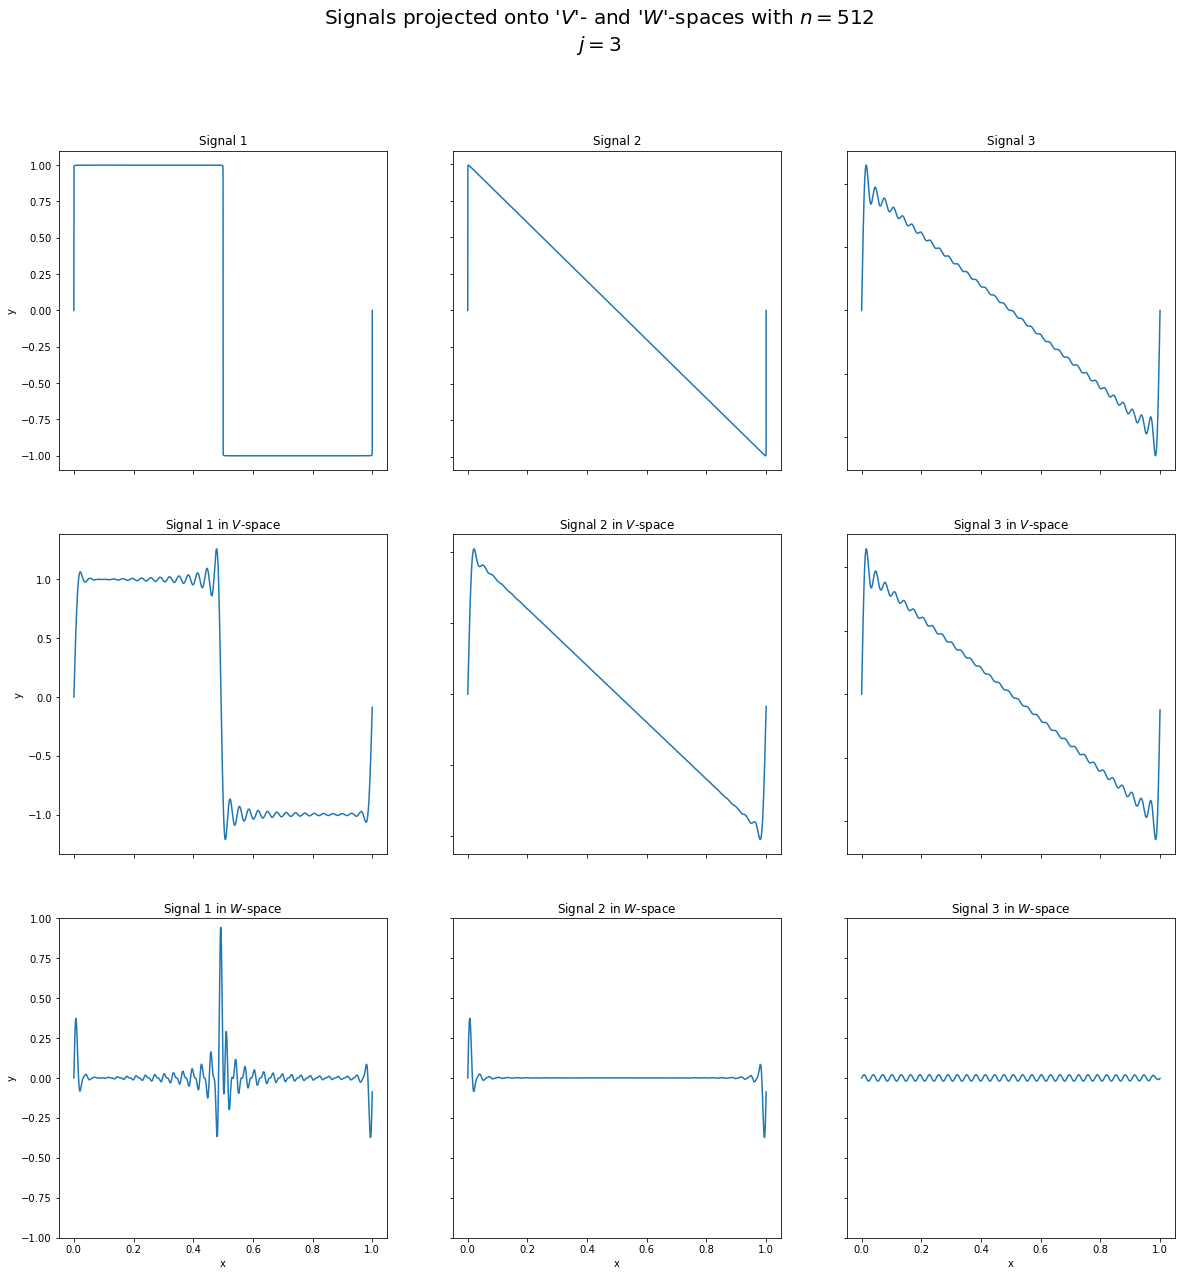

In [16]:
n = 512
n_signals = 3

x, signals = get_signals(n_signals)

# Plots result for different j and different signals
for j in range(1,4):
    fig, axs = plt.subplots(3,n_signals, figsize = (20,20))
    fig.suptitle("Signals projected onto '$V$'- and '$W$'-spaces with $n = 512$\n$j=$"+f"{j}", fontsize=20)
    fig.set_facecolor("white")
    for i in range(n_signals):
        s = signals[i]
        axs[0, i].plot(x, s)
        axs[0, i].set_title(f"Signal {i+1}")

        x_n, g_s = project_signal(x, s, n, j+1)
        axs[1, i].plot(x_n, g_s.real)
        axs[1, i].set_title(f"Signal {i+1} in " + "$V$-space")

        x_n, g_s = project_signal(x, s, n, j, W=True)
        axs[2, i].plot(x_n, g_s.real)
        axs[2, i].set_ylim(-1, 1)
        axs[2, i].set_title(f"Signal {i+1} in " + "$W$-space")

    for ax in axs.flat:
        ax.set(xlabel='x', ylabel='y')
        ax.label_outer()
    plt.show()

From our plots below it is clear that we really only need the scale-space to reconstruct our signal. The extra precision gained by the wavelet space demands twice the data as just using the scale-space. Also if we want to reconstruct our signal to a "reasonable" precision, i.e. using a "sufficient" $n$, the values of the projection onto $W_{\frac{n}{2^{j-1}},E_{\frac{n}{2^j}}}$ become negligible. Furthermore, the loss of precision is obviously the same as taking $\frac{n}{2}$ instead of $n$. Hence, if the goal is only to reconstruct the signal, we might as well spare the hassle of calculating the projections on the $W-space$. We can however confirm that our code above actually projects the signal in such a way by computing the functions in subspaces, and then adding them together. The code-snippet below does exactly this.

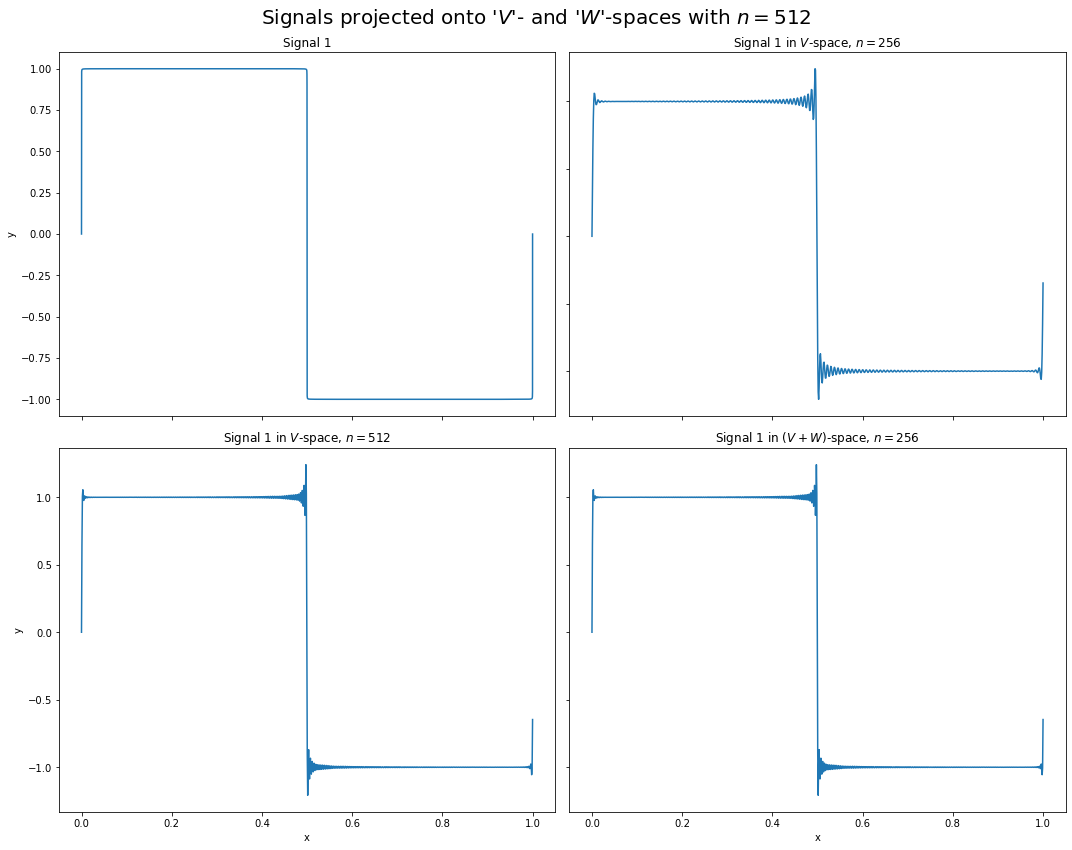

In [17]:
i = 1    # Signal
j = 1

# Plotting similar to earlier
fig, axs = plt.subplots(2,2, figsize = (15,12))
fig.suptitle("Signals projected onto '$V$'- and '$W$'-spaces with $n = 512$", fontsize=20)
fig.set_facecolor("white")

s = signals[i-1]

axs[0, 0].plot(x, s)
axs[0, 0].set_title(f"Signal {i}")

x_n, g_s_V = project_signal(x, s, n, j)
axs[1, 0].plot(x_n, g_s_V.real)
axs[1, 0].set_title(f"Signal {i} in " + f"$V$-space, $n = {int(n/(2**(j-1)))}$")

x_n, g_s_V2 = project_signal(x, s, n, j+1)
axs[0, 1].plot(x_n, g_s_V2.real)
axs[0, 1].set_title(f"Signal {i} in " + f"$V$-space, $n = {int(n/(2**(j)))}$")

x_n, g_s_W = project_signal(x, s, n, j, W=True)
axs[1, 1].plot(x_n, g_s_W.real + g_s_V2.real)
axs[1, 1].set_title(f"Signal {i} in " + f"$(V + W)$-space, $n = {int(n/(2**(j)))}$")


for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
    ax.label_outer()

plt.tight_layout()
plt.show()

As expected, when we add the projections together, we achieve the same result as if we were to only use the scale-space and with $n$ twice as big.

## Task 4 - Image decomposition

#### a) 2-dimensional DFT 

We now want to perform two-dimensional DFT on a set of images. To do this, we use `fft.fft2()`. Having done so, we then define an amplitude-matrix $A$ and phase-matrix $P$ corresponding to the fourier transform $\hat{F} = |\hat{F}| e^{i \phi_k}$ in the following way:

$$
A= (|\hat{F_k}|)_k,  \hspace{1cm} P = (\phi_k)_k 
$$

With this in mind, we will look closer at two gray-scaled images; namely `barbara.gif` and `klaus.gif`. To gain some intuition about what $A$ and $P$ represent, we try to switch the phase-matrices of the 2D fourier transform of the images, apply the inverse 2d-transform, and plot the result.

(-0.5, 511.5, 511.5, -0.5)

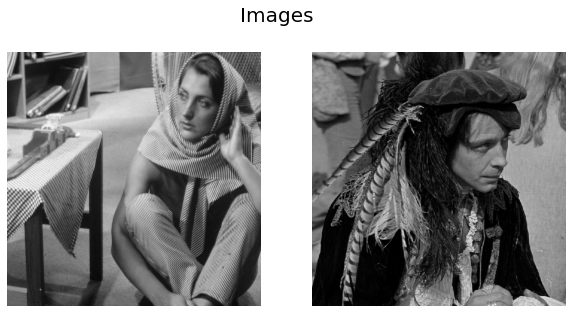

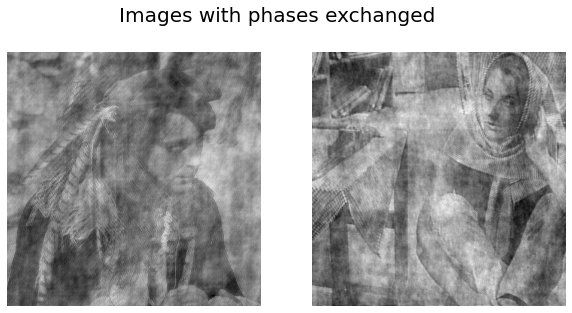

In [18]:
#import images 
barbara = plt.imread("project2-data/barbara.gif")
klaus = plt.imread("project2-data/klaus.gif")

# make sure images are of same dimension
assert np.shape(barbara) == np.shape(klaus)

#dimension of barbara (and klaus)
N = np.shape(barbara)[0]

#2d- fourier transform
barb_transf = fft.fft2(barbara)
klaus_transf = fft.fft2(klaus)

#def amplitude- and phase matrices
A_barb = abs(barb_transf)
P_barb = np.angle(barb_transf)

A_klaus = abs(klaus_transf)
P_klaus = np.angle(klaus_transf)

#reconstruct images with phases exchanged
barb_reconstructed = fft.ifft2(A_barb * np.exp(P_klaus * 1j ))
klaus_reconstructed = fft.ifft2(A_klaus *  np.exp(P_barb * 1j))


#plot original images
fig, axs  = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
fig.suptitle("Images", fontsize = 20)

axs[0].imshow(barbara, cmap="gray")
axs[0].axis("off")

axs[1].imshow(klaus, cmap="gray")
axs[1].axis("off")


#plot reconstructed images
fig, axs  = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
fig.suptitle("Images with phases exchanged", fontsize = 20)

axs[0].imshow(barb_reconstructed.real, cmap="gray")
axs[0].axis("off")

axs[1].imshow(klaus_reconstructed.real, cmap="gray")
axs[1].axis("off")

As we can see from the reconstructed images of barbara.gif and klaus.gif, the phase-matrix $P$ seems to hold a lot of information about the contours of the image. In the reconstructed image of barbara for example, there is no trace of the original image that is visible. But in contrast one can see a weak outline of Klaus, only now with weaker contours and shades of gray compared to the original image. The same goes the other way for the reconstructed version of `klaus.gif`; one can see a clear outline of Barbara, and no trace of Klaus. Furthermore, both reconstructions have a irregular pattern of darker patches, which to the naked eye do not seem to originate from any of the two images.

#### b) Removal of half-toning using fourier transform

We now want to look at an application of fourier-transforms on images, namely to remove "half-toning" from images. To get a better understanding of what half-toning is, we start by looking at the image we want to alter.

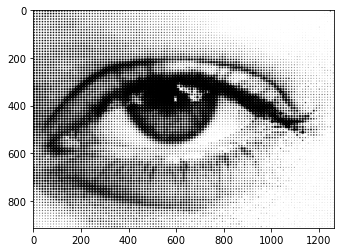

In [19]:
# import image and plot

yarminton = np.array(Image.open("project2-data/Yarimton-dithered.png").convert("L"))
plt.imshow(yarminton,cmap = "gray")
plt.show()

As we can see, the image is comprised of many differently shaded and sized dots. These are the dots we wish to "smooth out". To do so, we will use the fact they show up in our image at a certain frequency, making it possible for us to apply a fourier transform. Acknowledging that the dots are mapped to higher frequencies than the other details of the image, one would presume that setting the high-frequency signals to zero in our 2D fourier transform could remove these dots. We try to implement this idea in code below, in a function we call `image_smoother()`. We also plot the amplitude matrix $A$ in this function, using a function we define as `amplitude_plot()`. To get anything visually interesting, we plot $A$ logaritmically.

In [20]:
def image_smoother(image, r0, inverse = False):
    """
    Remove high-frequency signals of image,
    and return the reconstructed version

    Input:
        image: a 2d array with real-valued elements 
            representing an image
        r0: radius of the circle centered in centre of array,
            for which we dont set values to zero
        inverse: boolean, False by default. States whether the circle
        or the surrounding should be set to zero. False means the surrounding
    Output:
        image_reconstructed: the reconstructed image after 
        some set of signals are removed

    """
    #2d- fourier transform
    transf = fft.fft2(image)

    #def amplitude- and phase matrix
    A = abs(transf)
    P= np.angle(transf)

    A = fft.fftshift(A)

    # dimension of image
    N,M = np.shape(image)

    #centre point
    centre = (N//2, M//2)

    # set all points not in circle to zero
    for i in range(N):
        for j in range(M):
            r = (i-centre[0], j - centre[1])
            dist = np.sqrt(r[0]**2 + r[1]**2)
            if inverse and dist <= r0:
                A[i][j] = 0
            elif not inverse and dist > r0:
                A[i][j] = 0

    #shift back A
    A = fft.ifftshift(A)

    #reconstruct image
    image_reconstructed = fft.ifft2(A * np.exp(P * 1j)).real
    
    return image_reconstructed

In [21]:
def amplitude_plot(image):
    """
    Plot amplitude matrix of image

    Input:
        image: a 2d array with real-valued elements 
            representing an image
    Output:
        No return value, only plots amplitude
    """


    #2d fourier transform
    transf = fft.fft2(image)

    #def amplitude- matrix
    A = abs(transf)

    #plot
    plt.title("Amplitude matrix")
    plt.imshow(np.log(A), cmap="gray")
    plt.show()

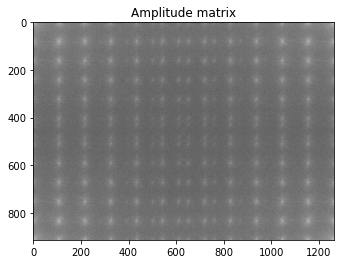

(-0.5, 1263.5, 913.5, -0.5)

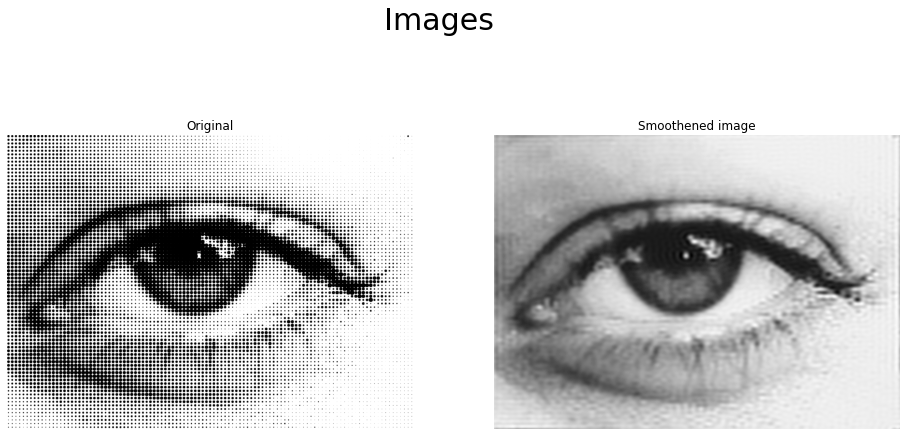

In [22]:
#import image
yarminton = np.array(Image.open("project2-data/Yarimton-dithered.png").convert("L"))

#set radius
r0 = 60

#define smoothened image
yar_rec = image_smoother(yarminton,r0)

#plot amplitude matrix
amplitude_plot(yarminton)

# plot
fig, axs  = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)
fig.suptitle("Images", fontsize = 30)
axs[0].set_title("Original")
axs[0].imshow(yarminton, cmap = "gray")
axs[0].axis("off")
axs[1].set_title("Smoothened image")
axs[1].imshow(yar_rec, cmap = "gray")
axs[1].axis("off")

As is clear from the two images above, our method successfully removes a lot of the dots that are present in the original image; but not all. For example, the bigger dots closer to the right corner of the eye are still visible. This is probably because the frequency that these bigger dots are mapped to, are significantly lower than those of the smaller dots. This makes sense, as these dots are not very frequent in the plot. Still, the algorithm we implemented is largely successful. We now apply it for some other images. Note that we will use different values of $r_0$ here, depending on the structure of the image.

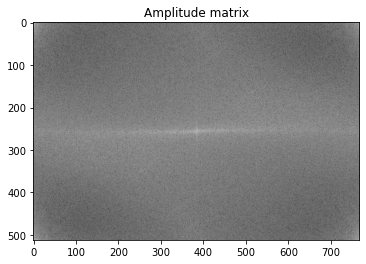

(-0.5, 767.5, 511.5, -0.5)

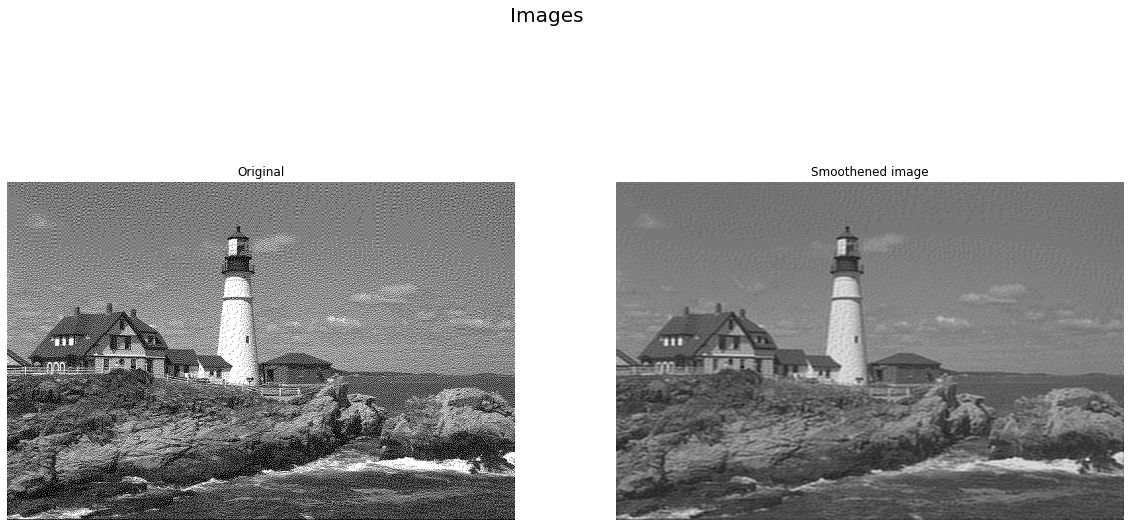

In [23]:
#Lighthouse

lighthouse = np.array(Image.open("project2-data/lighthouse-dithered.png").convert("L"))
r0 = 110
lighthouse_rec = image_smoother(lighthouse,r0)

#plot amplitude matrix
amplitude_plot(lighthouse)

#plot
fig, axs  = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle("Images", fontsize = 20)

axs[0].set_title("Original")
axs[0].imshow(lighthouse, cmap = "gray")
axs[0].axis("off")

axs[1].set_title("Smoothened image")
axs[1].imshow(lighthouse_rec, cmap = "gray")
axs[1].axis("off")

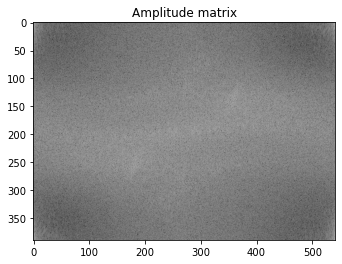

(-0.5, 540.5, 389.5, -0.5)

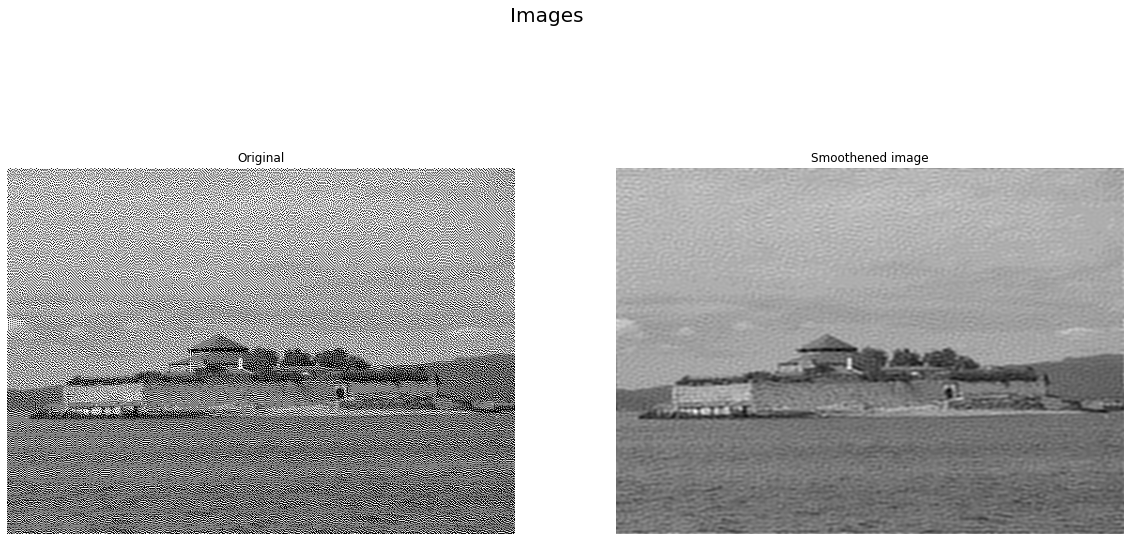

In [24]:
#Munkholmen

munkholmen = np.array(Image.open("project2-data/munkholmen-dithered.png").convert("L"))
r0 = 90
munkholmen_rec = image_smoother(munkholmen,r0)


#plot amplitude matrix
amplitude_plot(munkholmen)

#plot
fig, axs  = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle("Images", fontsize = 20)
axs[0].set_title("Original")
axs[0].imshow(munkholmen, cmap = "gray")
axs[0].axis("off")
axs[1].set_title("Smoothened image")
axs[1].imshow(munkholmen_rec, cmap = "gray")
axs[1].axis("off")

In general, we can see that our method does work for removing large amounts of the dot artifacts in our images. Note that the values for $r_0$ are adapted to optimize the result by trail and error. It is clear that we are able to remove the dots, but it seems that this is at the cost of the sharpness of the image; this directly related to the size of $r_0$. Reducing the size of $r_0$ will therefore give a better removal of the half-toning, but will also make the image more blurry. Intuitively this is understandable, as a smoothening of an image will make an image blurry. For `yarminton.png`, it is easier to separate the dots from the rest of the image than the other two. This can also be seen from the amplitude matrices, where `yarminton.png` has much more distinct peaks compared to the other two.  

#### c) Applying wavelet approach to images
 
These images generate $\mathbb{C}^{N_1\times N_2}$ arrays, so as discussed we have a two-dimensional case. If we are to generalize our discussion on wavelets form **Task 2**, it would be appropriate to find a basis for the spaces of translates in two dimensions. We define $\boldsymbol{N} = (N_1, N_2)^T$ and $F: \mathbb{T}^2 = [0,1)^2 \rightarrow \mathbb{C}$, such that the spaces of translates are defined as $V_{\boldsymbol{N}, F}$.

We now rewrite $F$ as a tensor product using $\boldsymbol{x} = (x_1, x_2)^T$ such that $F(\boldsymbol{x}) = f_{N_1}(x_1)\otimes f_{N_2}(x_2) = f_{N_1}(x_1)f_{N_2}(x_2)$. 

Using $\boldsymbol{j} = (j_1, j_2)^T$, the translates of $F$ now become

$$
\tau_{\boldsymbol{N}}^{\boldsymbol{j}}F(\boldsymbol{x}) = \tau_{N_1}^{j_1}f_{N_1}(x_1)\tau_{N_2}^{j_2}f_{N_2}(x_2) = f_{N_1} \left(x_1 - \frac{j_1}{N_1}\right)f_{N_2}\left(x_2 - \frac{j_2}{N_2}\right)
$$

Hence a general idea of how to write the spaces $V_{\boldsymbol{N}, F}$ becomes

$$
V_{\boldsymbol{N}, F} = \text{span}\{ \tau_{\boldsymbol{N}}^{\boldsymbol{j}}F(\boldsymbol{x}) \}
= \text{span}\left\{ f_{N_1} \left(x_1 - \frac{j_1}{N_1}\right)f_{N_2}\left(x_2 - \frac{j_2}{N_2}\right) \right\}, \, j_1,j_2=0,1,\ldots,N-1
$$

### d)

Using our idea from **4c)**, and denoting $\boldsymbol{D_N} = (D_{N_1}, D_{N_2})^T$, the scale space becomes

$$
V_{\boldsymbol{N}, \boldsymbol{D_N}} = \text{span}\{ \tau_{\boldsymbol{N}}^{\boldsymbol{j}}\boldsymbol{D}(\boldsymbol{x}) \}
= \text{span}\left\{ D_{N_1} \left(x_1 - \frac{j_1}{N_1}\right)D_{N_2}\left(x_2 - \frac{j_2}{N_2}\right) \right\}, \\ j_1=0,1,\ldots,N_1-1, \,\, j_2=0,1,\ldots,N_2-1
$$

We can use the `PyWavelets`-package (https://pywavelets.readthedocs.io/en/latest/index.html) to study some interesting features. When applying the transform, we will get "blocks" corresponding to different details in the image. One can use the transform multiple times, similar to how we "reduced" the size of the space in **3d)**. We use the built in transform two times and attempt to remove some blocks to see if it has an effect on the dithering.

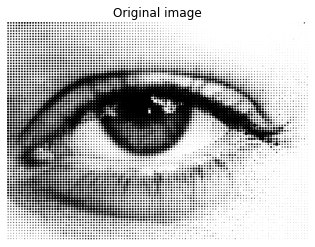

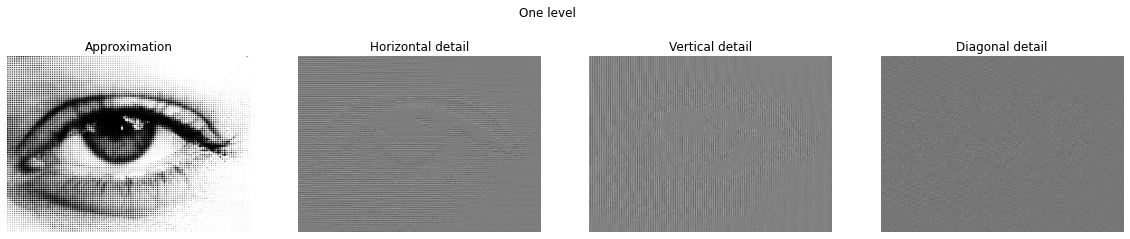

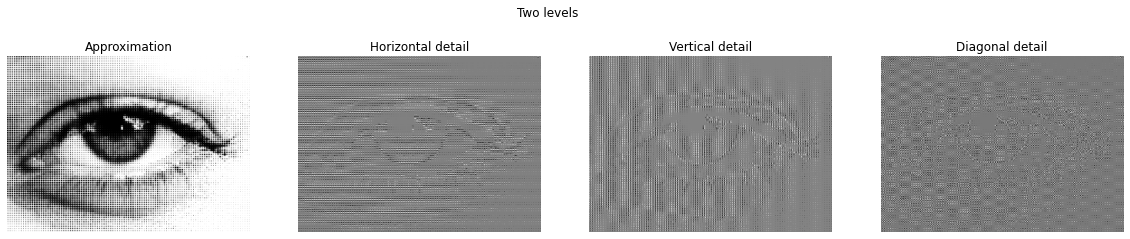

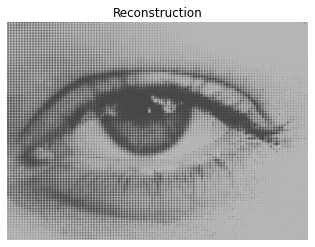

In [25]:
import pywt

data = np.array(Image.open("project2-data/Yarimton-dithered.png").convert("L"))
plt.imshow(data, cmap="gray")
plt.title("Original image")
plt.axis("off")
plt.show()

# Transform
coeffs = pywt.dwt2(data, 'haar')

fig, axs = plt.subplots(1,4, figsize=(20,4))
fig.suptitle("One level")
fig.set_facecolor("white")
for i in range(2):
    if not i:
        axs[i].imshow(coeffs[i], cmap="gray")
        axs[i].set_title("Approximation")
        axs[i].axis("off")
    else:
        for j in range(3):
            axs[i+j].imshow(coeffs[i][j], cmap="gray")
            axs[i+j].set_title(["Horizontal", "Vertical", "Diagonal"][j] + " detail")
            axs[i+j].axis("off")

plt.show()

LL, (LH, HL, HH) = coeffs

# Another transform
coeffs2 = pywt.dwt2(LL, 'haar')
LL2, (LH2, HL2, HH2) = coeffs2

# Plotting
fig, axs = plt.subplots(1,4, figsize=(20,4))
fig.suptitle("Two levels")
fig.set_facecolor("white")
for i in range(2):
    if not i:
        axs[i].imshow(coeffs2[i], cmap="gray")
        axs[i].set_title("Approximation")
        axs[i].axis("off")
    else:
        for j in range(3):
            axs[i+j].imshow(coeffs2[i][j], cmap="gray")
            axs[i+j].set_title(["Horizontal", "Vertical", "Diagonal"][j] + " detail")
            axs[i+j].axis("off")
plt.show()

# Setting blocks to zero
recon_data = pywt.idwt2((LL2, (None, HL2, HH2)), 'haar')
recon_data = pywt.idwt2((recon_data[1:], (LH, HL, None)), 'haar')

# Reconstructing
plt.imshow(recon_data, cmap="gray")
plt.title("Reconstruction")
plt.axis("off")
plt.show()

Having attempted to remove different blocks, different combination of blocks and introducing "thresholds" in the blocks we never really got a good result. The image generally just becomes more "foggy". The example above shows the best result we were able to achieve.

A little bit funny, but not so useful thing, we can do when adding filters to transforms is merging them together. Below we have added a high-pass filter to `barbra.gif` and a low-pass filter to `klaus.gif` and then merged them together.

(-0.5, 511.5, 511.5, -0.5)

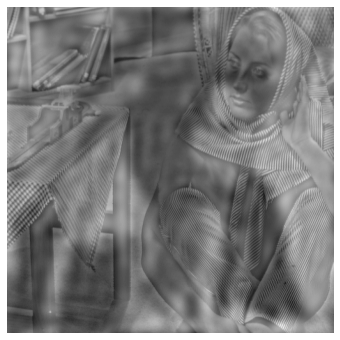

In [26]:
plt.rcParams["figure.figsize"] = (6,6)


r0 = 10

secret_im1 = np.array(Image.open("project2-data/barbara.gif").convert("L"))
secret_im2 = np.array(Image.open("project2-data/klaus.gif").convert("L"))
recon_im2 = image_smoother(secret_im2, 1.5*r0)
recon_im1 = image_smoother(secret_im1, 2*r0, inverse=True)

plt.imshow(recon_im1+recon_im2, cmap="gray")
plt.axis("off")

As we can see from the resulting image, the two images `barbara.gif` and `klaus.gif` are layered on top of each other. Looking at it plainly, it is possible to see the outlines of barbara. But if one were to squint with both eyes and/or look at the image from a distance, barbara "disappears" and the images of klaus becomes more distinct. 